### **Описание проекта**

Интернет-магазин "Стримчик", продает по всему миру комьюторные игры. Из открытых источников доступны исторические данные о продажахигр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года.
Мы планируем кампанию на 2017 год.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**ЗАДАЧА** <br>Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План исследования** 

**1. Изучение общей информации**
- Открыть файл с данными и изучить общую информацию

**2. Предобработка данных**
- Проверка наименований столбцов, проверка наличия дубликатов
- Обработка пропусков
- Проверка уникальных значений и изменение типов данных
- Добавление дополнителных столбцов о суммарных продажаж

**3. Исследовательский анализ данных**
- Анализ количества игр по годам
- Анализ продаж по платформам
- Выбор актуального периода, выявление лидеров по продажам в актуальном периоде, выбор потенциально прибыльных платформ
- Анализ глобальных продаж игр в разбивке по платформам
- Анализ влияния отзывов пользователей и отзывов критиков на продажи внутри популярных платформ
- Анализ жанров

**4. Портрет пользователя региона**
- Сотавим портрет пользователя по каждому региону отдельно:
- - Выделим популярные платформы
- - Выделим популярные жанры
- - Влият ли рейтинг ESRB на продажи в каждом регионе?

**5. Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**6. Общий вывод**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

In [3]:
# выводим первые 10 строк датафрейма

games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# сводная информация по таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***ОПИСАНИЕ ДАННЫХ***

•	Name — название игры <br>
•	Platform — платформа <br>
•	Year_of_Release — год выпуска <br>
•	Genre — жанр игры <br>
•	NA_sales — продажи в Северной Америке (миллионы проданных копий) <br>
•	EU_sales — продажи в Европе (миллионы проданных копий) <br>
•	JP_sales — продажи в Японии (миллионы проданных копий) <br>
•	Other_sales — продажи в других странах (миллионы проданных копий) <br>
•	Critic_Score — оценка критиков (максимум 100) <br>
•	User_Score — оценка пользователей (максимум 10) <br>
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). <br>


Числовые характеристики и гистограммы исходных данных

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Имеем исходную таблицу из 16715 строк и 11 столбцов. <br> Количество значений в столбцах различно, это означает, что в таблице есть пропуски. <br> Необходимо проверить наличие дубликатов, исправить названия столбцов, обработать пропуски. Также мы видим, что требуется замена типов данных в столбцах  Year_of_Release, User_Score

### **Предобработка данных**

#### Проверим наличие дубликатов в исходных данных

In [6]:
games.duplicated().sum()

0

Явные дубликаты отсутствуют.

#### Наименования столбцов

In [7]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Исправляем названия колонок, в которых есть расхождения с хорошим стилем. В последующем поможет избежать ошибок, связанных с синтаксисом. <br> Приводим все названия к одному регистру

In [8]:
games.columns = games.columns.str.lower()

In [9]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Пропущенные значения

In [10]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим пропуски в процентном соотношении:

In [11]:
for col in games.columns:
    no_value = games[col].isna().mean()
    if no_value > 0:
        print(col, int(no_value * 100), games[col].dtype, sep='.....')

name.....0.....object
year_of_release.....1.....float64
genre.....0.....object
critic_score.....51.....float64
user_score.....40.....object
rating.....40.....object


In [12]:
games.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Незначительное количество пропусков в столбцах name (название игры), year_of_release (год выпуска) и genre (жанр игры) - от 0 до 1 %. <br> А вот в столбцах user_score (оценка пользователей), rating (рейтинг) и critic_score (отценка критиков) имеют существенное количество пропусков (более 40 %) и требуют тщательного анализа и заполнения.

In [13]:
# пропуски столбца 'name'
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# пропуски столбца 'genre'
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в 'name' и 'genre' всего в 2 строках и они совпадают. Удалим эти 2 строки, так как помимо наименования и жанра они еще имеют достаточно пропусков.

In [15]:
# удаление строк с пропусками
games = games.dropna(subset=['name']).reset_index(drop=True)

In [16]:
# пропуски в процентном соотношении
for col in games.columns:
    no_value = games[col].isna().mean()
    if no_value > 0:
        print(col, int(no_value * 100), games[col].dtype, sep='.....')

year_of_release.....1.....float64
critic_score.....51.....float64
user_score.....40.....object
rating.....40.....object


In [17]:
# проверка пропусков столбца 'genre' после удаления
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [18]:
# проверка пропусков столбца 'name' после удаления
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
# проверка пропусков столбца 'year_of_release'
display(games[games['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Строк с пропущенными значениями 269, в районе 1%, заменять их нецелесообразно, поэтому удаляем

In [20]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [21]:
display(games[games['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Проверяем уникальные значания в столбцах

In [22]:
# Проверим уникальные значения столбца 'name' 
print(games['name'].sort_values().unique())

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']


In [23]:
# удаляем пробелы в названии в начале и в конце строки
games['name'] = games['name'].str.strip()

In [24]:
# приводим к нижнему регистру
games['name'] = games['name'].str.lower()

In [25]:
# Проверим уникальные значения столбца 'name' 
print(games['name'].sort_values().unique())

["'98 koshien" '.hack//g.u. vol.1//rebirth' '.hack//g.u. vol.2//reminisce'
 ... 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']


In [26]:
# Проверим уникальные значения столбца 'platform' 
print(games['platform'].sort_values().unique())

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [27]:
# Проверим количество уникальных значений столбца 'platform'
len(games['platform'].unique())

31

In [28]:
# Проверим уникальные значения столбца 'year_of_release'
print(games['year_of_release'].sort_values().unique())

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.]


In [29]:
# Проверим количество уникальных значений столбца 'year_of_release'
len(games['year_of_release'].unique())

37

In [30]:
# Проверим уникальные значения столбца 'genre'
print(games['genre'].sort_values().unique())

['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [31]:
# Проверим количество уникальных значений столбца 'genre' 
len(games['genre'].unique())

12

In [32]:
# приводим к нижнему регистру
games['genre'] = games['genre'].str.lower()

In [33]:
# Проверим уникальные значения столбца 'genre'
print(games['genre'].sort_values().unique())

['action' 'adventure' 'fighting' 'misc' 'platform' 'puzzle' 'racing'
 'role-playing' 'shooter' 'simulation' 'sports' 'strategy']


In [34]:
# Проверим уникальные значения столбца 'user_score'
print(games['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


In [35]:
# Проверим количество  значений 'tbd' столбца 'user_score'
games.loc[games['user_score'] == 'tbd'] ['user_score'].count()

2376

Помимо nan присутствует значение 'tbd'. Что значит это сокращение? Аббревиатура расшифровывается как - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату. Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. Данную абревиатуру необходимо заменить, так как она не даст изменить тип данных в столбце. Заменим на nan.

In [36]:
# замена 'tbd' столбца 'user_score' на 'nan'
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

In [37]:
print(games['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' nan]


In [38]:
print(games['rating'].sort_values().unique())

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


**Система ESRB - США, Мексика и Канада**:<br> **EC** - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. <br> **E** - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. <br> **E 10+**	- Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. <br> **T** - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.<br> **M** - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. <br> **AO** - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.<br> **RP** -	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Категория **'K-A'** - это устаревшая категория игр - для детей и взрослых: игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E. Следовательно, заменим рейтинг K-A в таблице на E.

In [39]:
# замена рейтинга 'K-A' на 'E'
games['rating'] = games['rating'].replace('K-A', 'E')

In [40]:
# проверка уникальных значений рейтинга
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', nan], dtype=object)

In [41]:
# количество оставшихся пропусков
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [42]:
# пропусков в рейтинге 6676, заменим их на категорию "без рейтинга" - no_rating
games['rating'] = games['rating'].fillna('no_rating')

In [43]:
# проверка уникальных значений рейтинга
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'no_rating'], dtype=object)

Удалять данные пропуски не будем, их большое количество и есть риск исказить исходные даннные. Оставляем nan для дальнейшего анализа, возможно дальше будет ясно, возможно ли их заменить.

#### Изменение типов данных

In [44]:
games['year_of_release'] = games['year_of_release'].astype(int)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating


In [45]:
games['user_score'] = games['user_score'].astype(float)
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating


#### Суммарные продажи во всех регионах

In [46]:
#games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [47]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


In [48]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [49]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

**Вывод**<br> В процессе предобработки удалили строки с пропусками от 0 до 1,5%, число строк в таблице сократилось незначительно, до 16444: с индексацией 0-16443. Пропущенные значения пока оставлены в столбцах critic_score, user_score, rating, так как их количество превышает 40%, это очень много для удаления, так как есть риск исказить начальные данные. <br> В столбце 'rating' заменили устаревшее значение К-А и объединили его с категорией Е. Пропущенные значения nan заменили на значение  no_rating (без рейтинга).<br>  В столбце 'user_score' значение 'tbd' на 'nan', так как была необходимость изменить тип данных. <br> Изменены типы данных в столбцах 'year_of_release' с float (вещественные числа) на int (целое число) и 'user_score' с объекта на тип float

### **Исследовательский анализ данных**

#### Анализ по годам

In [50]:
# Сводная таблица количества игр по годам

games_volume_year = games.pivot_table(
    index='year_of_release', values='name', aggfunc='count')
display(games_volume_year)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


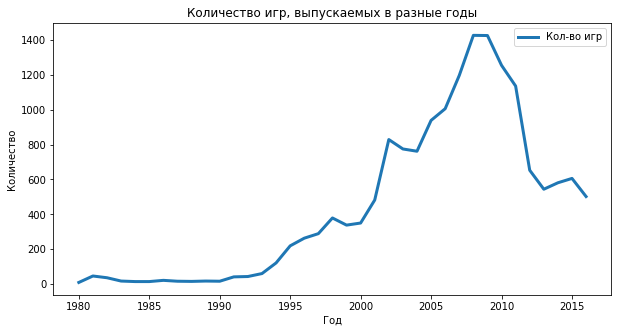

In [51]:
# Распределение количества выпускаемых игр по годам 
games_volume_year = games.pivot_table(
    index='year_of_release', values='name', aggfunc='count').plot(y='name', 
    linewidth=3, label='Кол-во игр', legend=True, figsize=(10, 5)
)
plt.title('Количество игр, выпускаемых в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

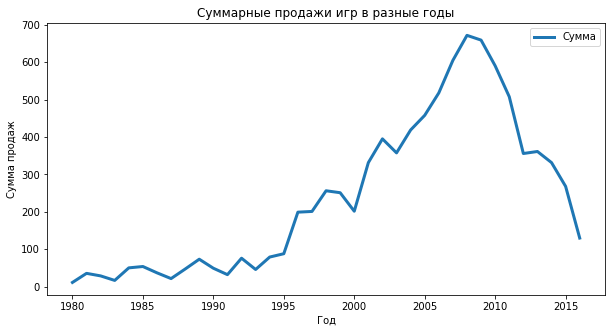

In [52]:
# Распределение суммарных продаж по годам 
games_sum_year = games.pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(y='total_sales', 
    linewidth=3, label='Сумма', legend=True, figsize=(10, 5)
)
plt.title('Суммарные продажи игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

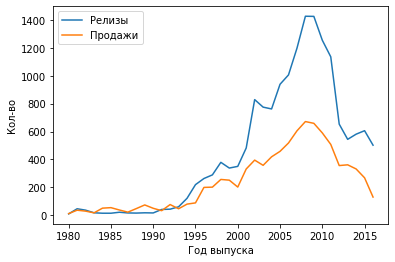

In [53]:
# совмещенный график количества продаж и суммарных продаж по годам 

plt.plot(games.groupby('year_of_release')['name'].count(), label='Релизы')
plt.plot(games.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во')
plt.show()

In [54]:
# добавим столбец с категориями по годам, укажем стадии развития
# 1980-1993 - "начальная"
# 1994-2004 - "развитие"
# 2005-2012 - "подъем"
# 2013-2016 - "спад"

def stage_development(row):
    try:
        if 1980 <= row['year_of_release'] <= 1993:
            return 'начальная'
        elif 1994 <= row['year_of_release'] <= 2004:
            return 'развитие'
        elif 2005 <= row['year_of_release'] <= 2012:
            return 'подъем'
        elif 2013 <= row['year_of_release'] <= 2016:
            return 'спад'
    except:
        return 'без категории'
    
games['stage_development'] = games.apply(stage_development, axis=1)

In [55]:
# Уникальные значения столбца 'stage_development'

games['stage_development'].unique()

array(['подъем', 'начальная', 'развитие', 'спад'], dtype=object)

In [56]:
# Сводная тадлица суммарных продаж по периодам

games.groupby('stage_development')['total_sales'].sum()

stage_development
начальная     580.23
подъем       4364.15
развитие     2779.30
спад         1090.69
Name: total_sales, dtype: float64

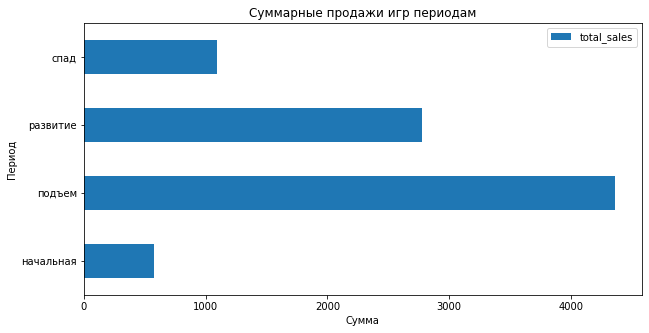

In [57]:
games.groupby('stage_development')['total_sales'].sum().plot(kind='barh', figsize=(10, 5))
plt.legend()
plt.title('Суммарные продажи игр периодам')
plt.xlabel('Сумма')
plt.ylabel('Период')
plt.show()

**Вывод** <br> Мы имеет данные за период 1980-2016 года. Начало этого периода совпало с появлением домашних компьютеров.<br> На графике 'Количество игр, выпускаемых в разные годы' и таблице games_volume_year мы видим, что активный рост количества выпускаемых игр начался после 1994 года. В 1994 количество превысило 100. Резкий рос начался в 2001 году, далее период 2003-2004 - некоторый спад, и снова с 2005 резкий рост до 2012 года. Период с 2013 до 2016 года характеризуется спадом.

#### Анализ продаж по платформам

In [58]:
# Сводная таблица суммарных продаж по платформам

games_platform_sum = games.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
display(games_platform_sum)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


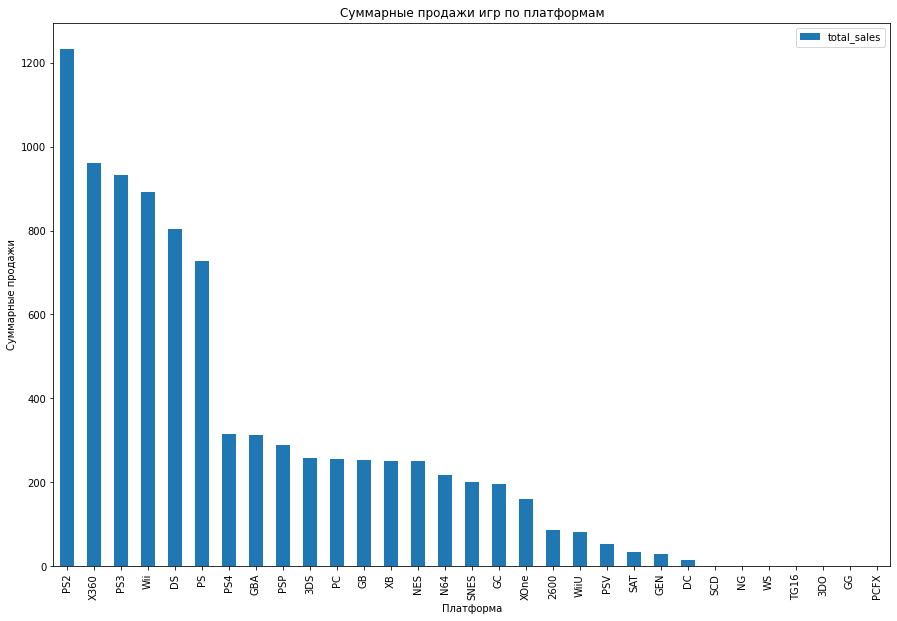

In [59]:
games_platform_sum.plot(kind='bar', y='total_sales', figsize=(15, 10))
plt.legend()
plt.title('Суммарные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

In [60]:
# Количество платформ по периодам

games_platform_stage = games.pivot_table(index=['stage_development'], values='platform', aggfunc='count')
display(games_platform_stage)

,platform
stage_development,
начальная,365
подъем,9039
развитие,4807
спад,2233


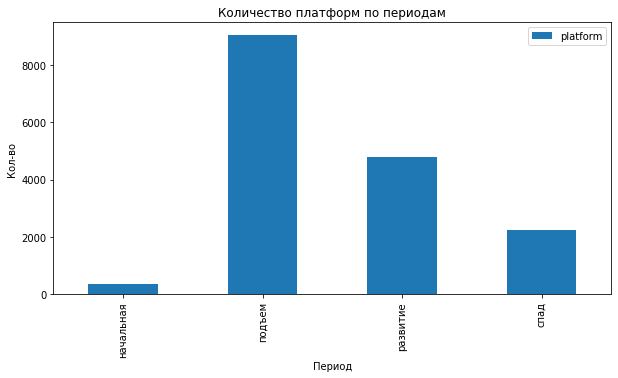

In [61]:
games_platform_stage.plot(kind='bar', y='platform', figsize=(10, 5))
plt.legend()
plt.title('Количество платформ по периодам')
plt.xlabel('Период')
plt.ylabel('Кол-во')
plt.show()

In [62]:
# Из всех платформ особо выделяются по продажам Топ-6: PS2, X360, PS3, Wii, DS, PS

top_6_platform = games_platform_sum.head(6)
display(top_6_platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [63]:
top_PS2 = games.query('platform == "PS2"')
print('Количество строк', len(top_PS2))
print('Начало релиза', top_PS2['year_of_release'].min())
print('Окончание релиза', top_PS2['year_of_release'].max())
print(top_PS2['year_of_release'].max() - top_PS2['year_of_release'].min() + 1, 'лет')
top_PS2.head(3)

Количество строк 2127
Начало релиза 2000
Окончание релиза 2011
12 лет


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,stage_development
17,grand theft auto: san andreas,PS2,2004,action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81,развитие
24,grand theft auto: vice city,PS2,2002,action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15,развитие
28,gran turismo 3: a-spec,PS2,2001,racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97,развитие


In [64]:
top_X360 = games.query('platform == "X360"')
print('Количество строк', len(top_X360))
print('Начало релиза', top_X360['year_of_release'].min())
print('Окончание релиза', top_X360['year_of_release'].max())
print(top_X360['year_of_release'].max() - top_X360['year_of_release'].min() + 1, 'лет')
top_X360.head(3)

Количество строк 1232
Начало релиза 2005
Окончание релиза 2016
12 лет


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,stage_development
14,kinect adventures!,X360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82,подъем
23,grand theft auto v,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,спад
29,call of duty: modern warfare 3,X360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,подъем


In [65]:
top_PS3 = games.query('platform == "PS3"')
print('Количество строк', len(top_PS3))
print('Начало релиза', top_PS3['year_of_release'].min())
print('Окончание релиза', top_PS3['year_of_release'].max())
print(top_PS3['year_of_release'].max() - top_PS3['year_of_release'].min() + 1, 'лет')
top_PS3.head(3)

Количество строк 1306
Начало релиза 2006
Окончание релиза 2016
11 лет


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,stage_development
16,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,спад
34,call of duty: black ops ii,PS3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,подъем
37,call of duty: modern warfare 3,PS3,2011,shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33,подъем


In [66]:
top_Wii = games.query('platform == "Wii"')
print('Количество строк', len(top_Wii))
print('Начало релиза', top_Wii['year_of_release'].min())
print('Окончание релиза', top_Wii['year_of_release'].max())
print(top_Wii['year_of_release'].max() - top_Wii['year_of_release'].min() + 1, 'лет')
top_Wii.head(3)

Количество строк 1286
Начало релиза 2006
Окончание релиза 2016
11 лет


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,stage_development
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,подъем
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,подъем
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,подъем


In [67]:
top_DS = games.query('platform == "DS"')
print('Количество строк', len(top_DS))
print('Начало релиза', top_DS['year_of_release'].min())
print('Окончание релиза', top_DS['year_of_release'].max())
print(top_DS['year_of_release'].max() - top_DS['year_of_release'].min() + 1, 'лет')
top_DS.head(3)

Количество строк 2121
Начало релиза 1985
Окончание релиза 2013
29 лет


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,stage_development
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,подъем
10,nintendogs,DS,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,no_rating,24.67,подъем
11,mario kart ds,DS,2005,racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21,подъем


In [68]:
top_PS = games.query('platform == "PS"')
print('Количество строк', len(top_PS))
print('Начало релиза', top_PS['year_of_release'].min())
print('Окончание релиза', top_PS['year_of_release'].max())
print(top_PS['year_of_release'].max() - top_PS['year_of_release'].min() + 1, 'лет')
top_PS.head(3)

Количество строк 1190
Начало релиза 1994
Окончание релиза 2003
10 лет


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,stage_development
52,gran turismo,PS,1997,racing,4.02,3.87,2.54,0.52,96.0,8.7,E,10.95,развитие
65,final fantasy vii,PS,1997,role-playing,3.01,2.47,3.28,0.96,92.0,9.2,T,9.72,развитие
67,gran turismo 2,PS,1999,racing,3.88,3.42,1.69,0.50,93.0,9.0,T,9.49,развитие


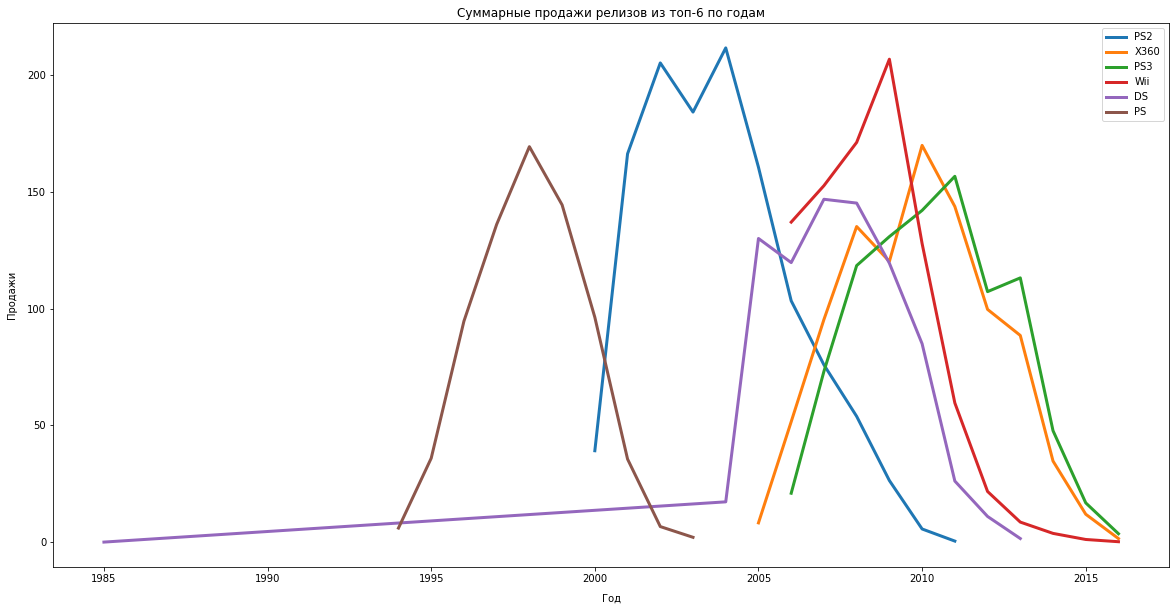

In [69]:
list_top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for name in list_top:
    games.query('platform == @name').pivot_table(
    index='year_of_release', values='total_sales', 
    aggfunc='sum').sort_values('year_of_release', ascending = False)['total_sales'].plot(figsize = (20, 10),
                                                                                         linewidth=3, label=name)
   
    plt.title('Суммарные продажи релизов из топ-6 по годам')
    plt.xlabel('Год', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

'DS' платформа с самым длинным периодом существования, она просуществовала с 1985 по 2013 год, но пик ее пришелся уже на 2005-2010 года <br> Остальные платформы из Топ-6 просуществовали от 10 до 12 лет: 'PS2' - 12 лет (2000-2011 год), 'X360' - 12 лет (2005-2016 год), 'PS3' - 11 лет (2006-2016 год), 'Wii' - 11 лет (2006-2016 год), 'PS' - 10 лет (1994-2003 год). Пик актуальности практически у все топ-6 приходится на середину периода <br> Раньше всех актуальность потеряли платформы 'PS' и 'PS2' <br> 

#### Анализ актуального периода 

Актуальным периодом возьмем 3 года, предшествующих прогнозируемому 2017 году. Остались только актуальные платформы.

In [71]:
# Срезаем данные актульного периода: 2014-2016 гг

games_actual = games.query('2014 <= year_of_release <= 2016').copy()
print(games_actual.info())
games_actual.drop(columns=['stage_development'], inplace=True)
display(games_actual.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1689 non-null   object 
 1   platform           1689 non-null   object 
 2   year_of_release    1689 non-null   int64  
 3   genre              1689 non-null   object 
 4   na_sales           1689 non-null   float64
 5   eu_sales           1689 non-null   float64
 6   jp_sales           1689 non-null   float64
 7   other_sales        1689 non-null   float64
 8   critic_score       718 non-null    float64
 9   user_score         888 non-null    float64
 10  rating             1689 non-null   object 
 11  total_sales        1689 non-null   float64
 12  stage_development  1689 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 184.7+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


In [72]:
# Сводная таблица суммарных продаж по актуальным платформам

games_actual_platform_sum = games_actual.pivot_table(
    index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
display(games_actual_platform_sum)

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


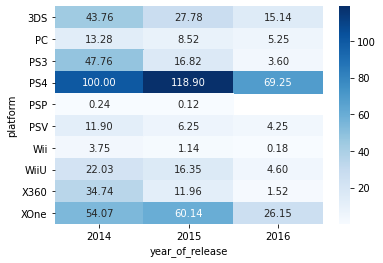

In [73]:
sns.heatmap(games_actual_platform_sum, annot=True, cmap="Blues", fmt='.2f')
plt.show()

In [74]:
# Сводная таблица суммарных продаж по актуальным платформам

games_actual_platform_sum2 = (games_actual.groupby(['platform'], as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False))
games_actual_platform_sum2

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


In [75]:
top_now = games_actual_platform_sum2['platform'].unique().tolist()
top_now

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

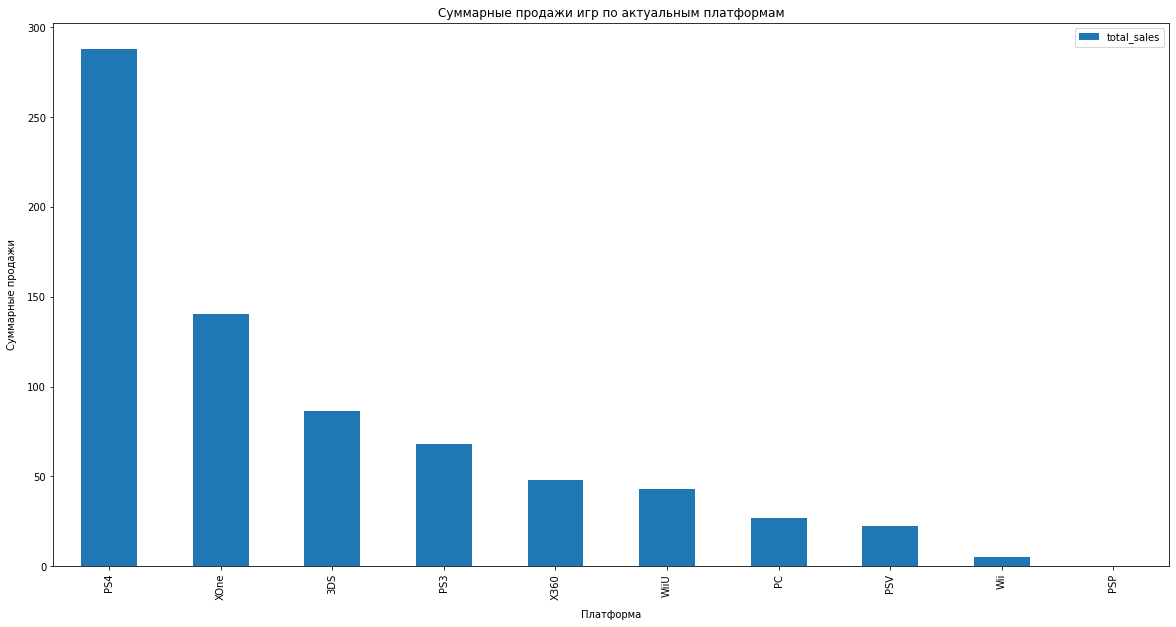

In [76]:
games_actual_platform_sum2.plot(kind='bar', x='platform', y=['total_sales'], figsize=(20, 10))
plt.legend()
plt.title('Суммарные продажи игр по актуальным платформам')
plt.xlabel('Платформа', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

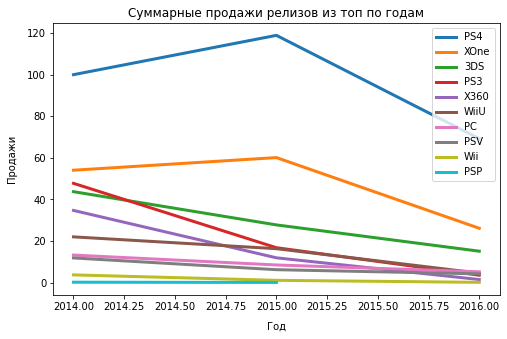

In [77]:
for name in top_now:
    games_actual.query('platform == @name').pivot_table(
    index='year_of_release', values='total_sales', 
    aggfunc='sum').sort_values('year_of_release', ascending = False)['total_sales'].plot(figsize = (8, 5),
                                                                                         linewidth=3, label=name)
   
    plt.title('Суммарные продажи релизов из топ по годам')
    plt.xlabel('Год', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

В актуальном списке 10 платформ. На пике в актуальном периоде находятся платформы PS4 и XOne. По данным видно, что практически все остальные платформы находятся в стадии снижения показателей. Всплески еть еще у платформ 3DS, PS3 и X360, но в общем продажи уже падают.

Рассмотрим более подробно эти платформы.


##### PS4

In [78]:
top_actual_PS4 = games_actual.query('platform == "PS4"')
display(top_actual_PS4.head())
print(len(top_actual_PS4), 'строк')
print('Статистика суммарных продаж PS4')
print(top_actual_PS4['total_sales'].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
92,call of duty: advanced warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


376 строк
Статистика суммарных продаж PS4
count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64


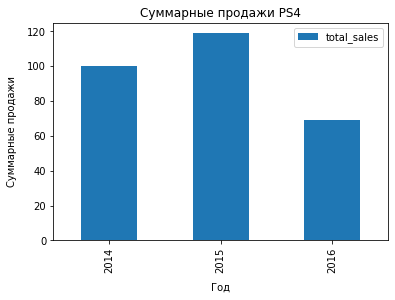

In [79]:
top_actual_PS4 = games_actual.query('platform == "PS4"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.legend()
plt.title('Суммарные продажи PS4')
plt.xlabel('Год', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

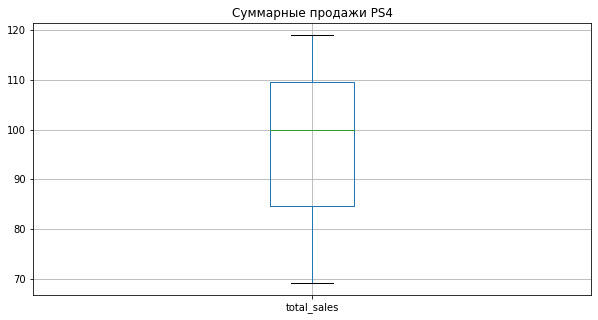

In [80]:
games_actual.query('platform == "PS4"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').boxplot('total_sales',  figsize=(10, 5))
plt.title('Суммарные продажи PS4')
plt.show()

##### XOne

In [81]:
top_actual_XOne = games_actual.query('platform == "XOne"')
display(top_actual_XOne.head())
print(len(top_actual_XOne), 'строк')
print('Статистика суммарных продаж XOne')
print(top_actual_XOne['total_sales'].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,call of duty: black ops 3,XOne,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,no_rating,7.39
165,grand theft auto v,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,call of duty: advanced warfare,XOne,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
241,halo 5: guardians,XOne,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,fallout 4,XOne,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


228 строк
Статистика суммарных продаж XOne
count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64


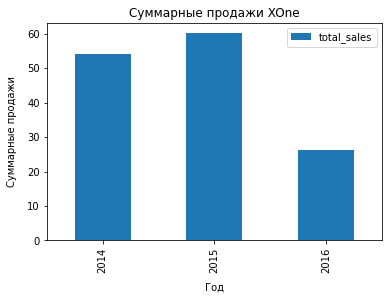

In [82]:
top_actual_XOne = games_actual.query('platform == "XOne"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.legend()
plt.title('Суммарные продажи XOne')
plt.xlabel('Год', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

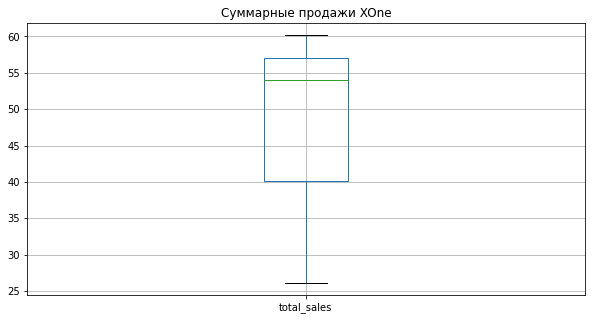

In [83]:
games_actual.query('platform == "XOne"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').boxplot(
    'total_sales', figsize=(10, 5))
plt.title('Суммарные продажи XOne')
plt.show()

 ##### PS3, X360 и 3DS

In [84]:
top_actual_PS3 = games_actual.query('platform == "PS3"')
display(top_actual_PS3.head())
print(len(top_actual_PS3), 'строк')
print('Статистика суммарных продаж PS3')
print(top_actual_PS3['total_sales'].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,minecraft,PS3,2014,misc,2.03,2.37,0.00,0.87,NaN,NaN,no_rating,5.27
254,call of duty: advanced warfare,PS3,2014,shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
263,fifa 15,PS3,2014,sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
548,fifa 16,PS3,2015,sports,0.41,1.84,0.05,0.40,NaN,3.2,E,2.70
1010,watch dogs,PS3,2014,action,0.56,0.81,0.10,0.27,NaN,5.1,M,1.74


219 строк
Статистика суммарных продаж PS3
count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: total_sales, dtype: float64


In [85]:
top_actual_X360 = games_actual.query('platform == "X360"')
display(top_actual_X360.head())
print(len(top_actual_X360), 'строк')
print('Статистика суммарных продаж X360')
print(top_actual_X360['total_sales'].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
262,call of duty: advanced warfare,X360,2014,shooter,2.77,1.11,0.0,0.40,NaN,4.9,M,4.28
490,fifa 15,X360,2014,sports,0.79,1.92,0.0,0.21,NaN,4.2,E,2.92
818,madden nfl 15,X360,2014,sports,1.77,0.06,0.0,0.22,NaN,5.5,E,2.05
887,destiny,X360,2014,shooter,1.31,0.43,0.0,0.18,NaN,4.7,T,1.92
1038,call of duty: black ops 3,X360,2015,shooter,1.14,0.40,0.0,0.16,NaN,NaN,no_rating,1.70


111 строк
Статистика суммарных продаж X360
count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: total_sales, dtype: float64


In [86]:
top_actual_3DS = games_actual.query('platform == "3DS"')
display(top_actual_3DS.head())
print(len(top_actual_3DS), 'строк')
print('Статистика суммарных продаж 3DS')
print(top_actual_3DS['total_sales'].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
96,super smash bros. for wii u and 3ds,3DS,2014,fighting,3.27,1.37,2.43,0.48,NaN,NaN,no_rating,7.55
108,pokemon sun/moon,3DS,2016,role-playing,2.98,1.45,2.26,0.45,NaN,NaN,no_rating,7.14
311,monster hunter 4 ultimate,3DS,2014,role-playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
404,monster hunter x,3DS,2015,action,0.27,0.21,2.79,0.05,NaN,NaN,no_rating,3.32


212 строк
Статистика суммарных продаж 3DS
count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64


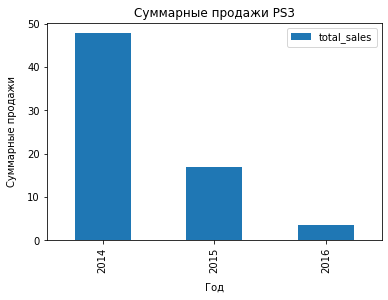

In [87]:
games_actual.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.legend()
plt.title('Суммарные продажи PS3')
plt.xlabel('Год', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

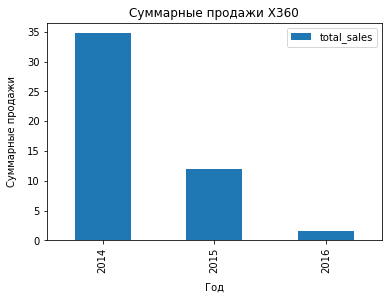

In [88]:
games_actual.query('platform == "X360"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.legend()
plt.title('Суммарные продажи X360')
plt.xlabel('Год', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

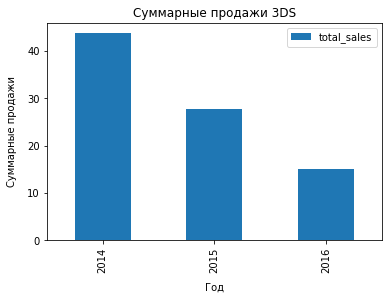

In [89]:
games_actual.query('platform == "3DS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.legend()
plt.title('Суммарные продажи 3DS')
plt.xlabel('Год', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

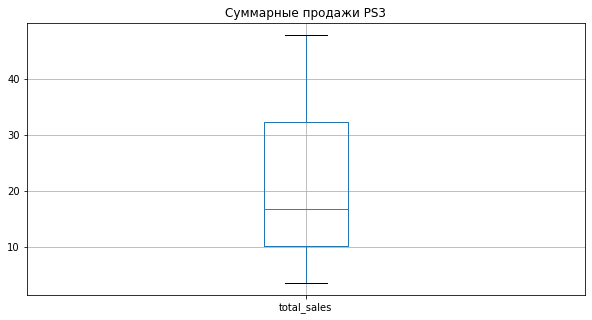

In [90]:
games_actual.query('platform == "PS3"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').boxplot(
    'total_sales', figsize=(10, 5))
plt.title('Суммарные продажи PS3')
plt.show()

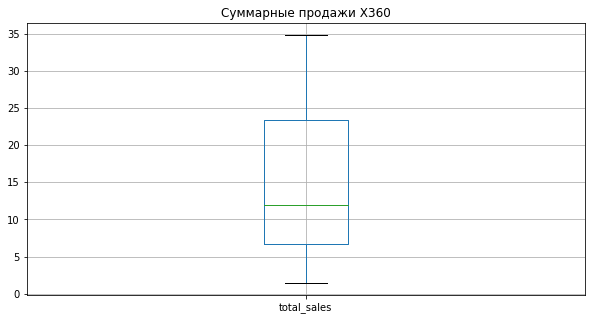

In [91]:
games_actual.query('platform == "X360"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').boxplot(
    'total_sales', figsize=(10, 5))
plt.title('Суммарные продажи X360')
plt.show()

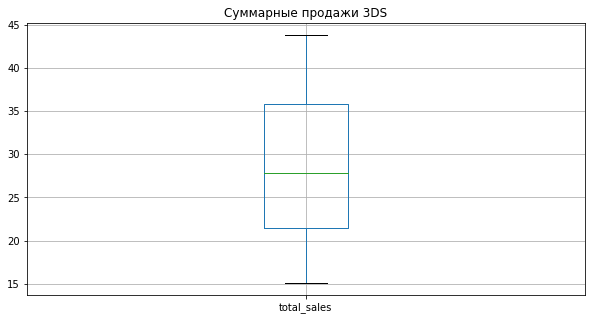

In [92]:
games_actual.query('platform == "3DS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').boxplot(
    'total_sales', figsize=(10, 5))
plt.title('Суммарные продажи 3DS')
plt.show()

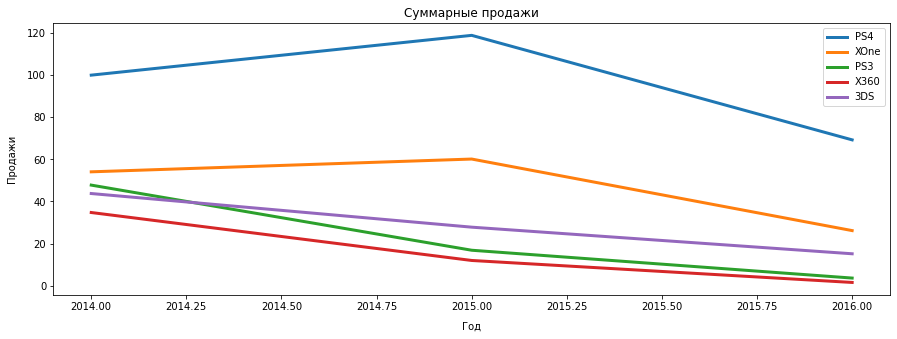

In [93]:
games_actual_popular = ['PS4', 'XOne', 'PS3', 'X360', '3DS']
for name in games_actual_popular:
    games_actual.query('platform == @name').pivot_table(
    index='year_of_release', values='total_sales', 
    aggfunc='sum').sort_values('year_of_release', ascending = False)['total_sales'].plot(figsize = (15, 5),
                                                                                         linewidth=3, label=name)
   
    plt.title('Суммарные продажи')
    plt.xlabel('Год', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

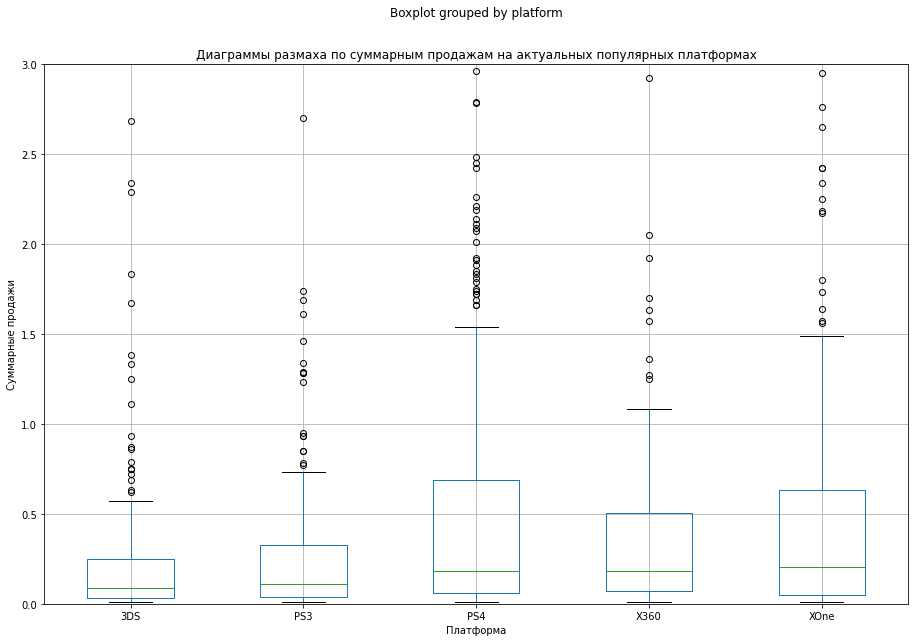

In [94]:
games_actual.query('platform in @games_actual_popular')[['platform', 'name', 'total_sales']].boxplot(
    column='total_sales', by='platform', figsize=(15, 10))
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.title('Диаграммы размаха по суммарным продажам на актуальных популярных платформах')
plt.ylim(0, 3)
plt.show()

In [95]:
# сводная статистика
games_actual.query('platform in @games_actual_popular')['total_sales'].describe()

count    1146.000000
mean        0.551126
std         1.215718
min         0.010000
25%         0.050000
50%         0.140000
75%         0.480000
max        14.630000
Name: total_sales, dtype: float64

In [96]:
display(games_actual.query('platform in @games_actual_popular')
        .pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .sort_values(('median', 'total_sales'), ascending=False))

,sum,mean,median,std,count
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
XOne,140.36,0.615614,0.205,1.046513,228
PS4,288.15,0.766356,0.185,1.614969,376
X360,48.22,0.434414,0.180,0.628967,111
PS3,68.18,0.311324,0.110,0.633059,219
3DS,86.68,0.408868,0.090,1.188368,212


Медиана по продажам отличается у XOne, PS4 и Х360 не сильно. Это говорит о высокой конкуренций среды разных платформ. Лидером продаж является PS4, но и размах продаж по годам у нее самый большой - во второй год с момента выпуска ее популярность выросла почти в 2 раза. Объемы Х360 малы по срвнению с лидером.

#### Влияние отзывов пользователей и критиков

Рассмотрим влияние на продажи отзывов пользователей и критиков на примере набирающей популярность платформы PS4.

In [97]:
display(games_actual.query('platform in @games_actual_popular').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


In [98]:
# оценка пользователей
display(games_actual.query('platform in @games_actual_popular')
        .pivot_table(index='platform', values='user_score', aggfunc=['mean', 'median', 'std', 'count'])
        .sort_values(('mean', 'user_score'), ascending=False))

,mean,median,std,count
,user_score,user_score,user_score,user_score
platform,,,,
3DS,7.138182,7.40,1.503513,55
PS4,6.828099,7.10,1.399035,242
XOne,6.594545,6.80,1.375139,165
PS3,6.014286,6.55,1.853222,98
X360,5.771084,6.00,1.709623,83


In [99]:
# оценка критиков
display(games_actual.query('platform in @games_actual_popular')
        .pivot_table(index='platform', values='critic_score', aggfunc=['mean', 'median', 'std', 'count'])
        .sort_values(('mean', 'critic_score'), ascending=False))

,mean,median,std,count
,critic_score,critic_score,critic_score,critic_score
platform,,,,
XOne,73.793548,76.0,12.252589,155
PS4,72.164557,73.0,12.214985,237
3DS,68.980392,69.0,12.858445,51
PS3,66.555556,67.0,13.557169,36
X360,63.730769,67.0,15.058706,26


In [100]:
# коэффициенты коореляции в зависимости от оценки пользоваьелей и критиков
PS4_top = games_actual.query('platform == "PS4"')
PS4_top = PS4_top.sort_values('user_score',ascending = False)
display('Коэффициент корреляции - оценка пользователей', PS4_top['user_score'].corr(PS4_top['total_sales']))
display('Коэффициент корреляции - оценка критиков', PS4_top['critic_score'].corr(PS4_top['total_sales']))

'Коэффициент корреляции - оценка пользователей'

-0.040131589472697356

'Коэффициент корреляции - оценка критиков'

0.4026614106810408

In [101]:
print(PS4_top['user_score'].isna().sum())
print(PS4_top['critic_score'].isna().sum())

134
139


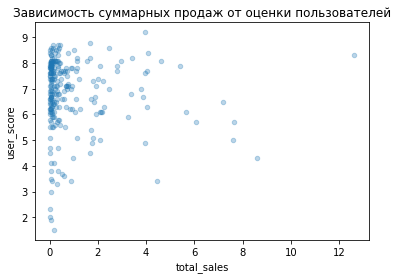

In [102]:
PS4_top.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки пользователей')
plt.show()

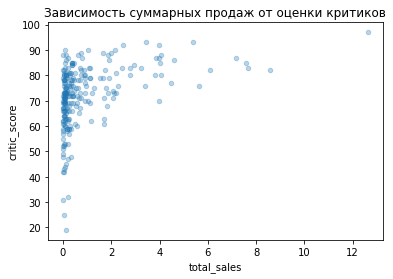

In [103]:
PS4_top.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки критиков')
plt.show()

Коэффициенты корреляции - оценка критиков, имеется прямая зависимость, но не сильная. Коэффициенты корреляции - оценка пользователей, имеется обратная зависимость, но очень слабая. Нельзя с уверенностью сказать, что именно отзывы пользователей или критоков влияют на продажи.

Рассмотрим ситуацию на другой платформе (с меньшим объемом продаж в актуальном периоде, чем у PS4, но существующую дольше). Например, PS3. Данная платформа существует с 2006 года (в общей сложности 11 лет) и в актуальном периоде суммарные продажи уже идут на спад.

In [104]:
# коэффициенты коореляции в зависимости от оценки пользоваьелей и критиков в актуальном периоде
PS3_top = games_actual.query('platform == "PS3"')
PS3_top = PS3_top.sort_values('user_score',ascending = False)
display('Коэффициент корреляции - оценка пользователей', PS3_top['user_score'].corr(PS3_top['total_sales']))
display('Коэффициент корреляции - оценка критиков', PS3_top['critic_score'].corr(PS3_top['total_sales']))

'Коэффициент корреляции - оценка пользователей'

-0.16676141347662113

'Коэффициент корреляции - оценка критиков'

0.44657460493190715

In [105]:
print(PS3_top['user_score'].isna().sum())
print(PS3_top['critic_score'].isna().sum())

121
183


Есть очень большое кол-во пропусков

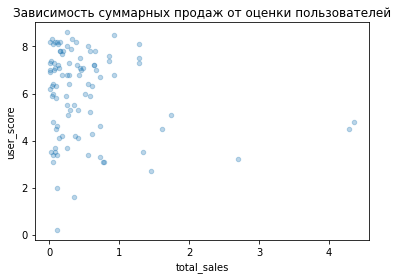

In [106]:
PS3_top.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки пользователей')
plt.show()

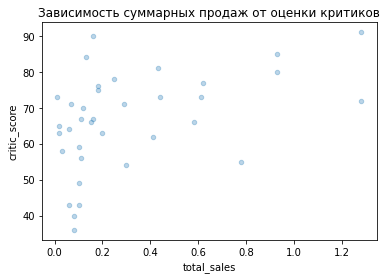

In [107]:
PS3_top.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки критиков')
plt.show()

Также посмотрим не актуальный период, а время существования платформы

In [108]:
# коэффициенты коореляции в зависимости от оценки пользоваьелей и критиков за весь период
PS3_top1 = games.query('platform == "PS3"')
PS3_top1 = PS3_top1.sort_values('user_score',ascending = False)
display('Коэффициент корреляции - оценка пользователей', PS3_top1['user_score'].corr(PS3_top1['total_sales']))
display('Коэффициент корреляции - оценка критиков', PS3_top1['critic_score'].corr(PS3_top1['total_sales']))

'Коэффициент корреляции - оценка пользователей'

0.12841562938563042

'Коэффициент корреляции - оценка критиков'

0.4327589578997136

In [109]:
print(PS3_top1['user_score'].isna().sum())
print(PS3_top1['critic_score'].isna().sum())

445
502


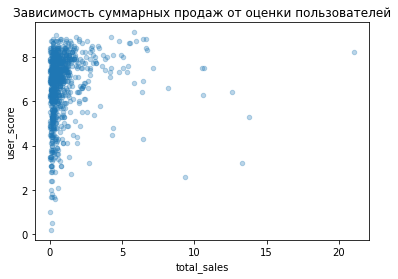

In [110]:
PS3_top1.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки пользователей')
plt.show()

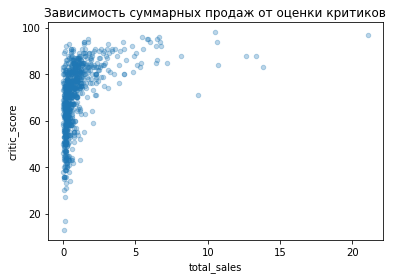

In [111]:
PS3_top1.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки критиков')
plt.show()

'Коэффициент корреляции - оценка пользователей' слабо отрицательная (обратная) (-0.16676141347662113). 
'Коэффициент корреляции - оценка критиков' - положительная, прямая зависимость, не слабая (0.44657460493190715).
За весь период коэффициент корреляции повыше, зависимость прямая, но также не достаточно сильная, что бы оказывать сильное влияние на продажи.

Возьмем еще одну платформу набирающую популярность в актуальном периоде, но чуть с малыми продажами в актуальном периоде - XOne.

In [112]:
# коэффициенты коореляции в зависимости от оценки пользоваьелей и критиков в актуальном периоде
XOne_top = games_actual.query('platform == "XOne"')
XOne_top = XOne_top.sort_values('user_score',ascending = False)
display('Коэффициент корреляции - оценка пользователей', XOne_top['user_score'].corr(XOne_top['total_sales']))
display('Коэффициент корреляции - оценка критиков', XOne_top['critic_score'].corr(XOne_top['total_sales']))

'Коэффициент корреляции - оценка пользователей'

-0.07038392806475811

'Коэффициент корреляции - оценка критиков'

0.42867694370333176

In [113]:
print(XOne_top['user_score'].isna().sum())
print(XOne_top['critic_score'].isna().sum())

63
73


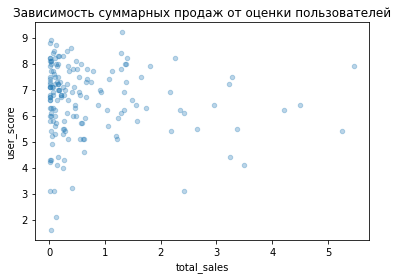

In [114]:
XOne_top.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки пользователей')
plt.show()

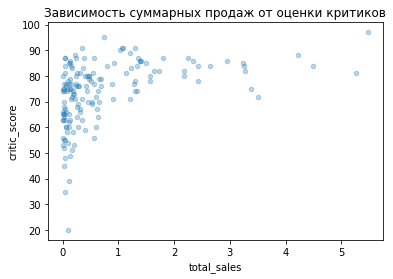

In [115]:
XOne_top.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Зависимость суммарных продаж от оценки критиков')
plt.show()

'Коэффициент корреляции - оценка пользователей' слабо отрицательная (обратная) (-0.07038392806475811). 
'Коэффициент корреляции - оценка критиков' - положительная, прямая зависимость, не слабая (0.42867694370333176).

Коэффициенты корреляции - от оценки пользователлей слабо отрицательный, имеется обратная зависимость, но она очень слабая. 
Коэффициенты корреляции - от оценки критиков положительный, имеется прямая зависимость, но не сильная.
Нельзя с уверенностью сказать, что именно отзывы пользователей или критоков влияют на продажи. Хотя стоит отметить , что оценка критиков оказывает большее влияние, чем оценка пользователей.

#### Анализ жанров

In [116]:
# распределение жанров по количеству за весь период (количество жанров у нас 12), сортировка по медиане
display(games.pivot_table(
    index='genre', values='total_sales', aggfunc=['mean', 'median', 'std', 'count'])
        .sort_values(('median', 'total_sales'), ascending=False))

,mean,median,std,count
,total_sales,total_sales,total_sales,total_sales
genre,,,,
platform,0.940262,0.27,2.587816,878
shooter,0.803519,0.24,1.831975,1296
sports,0.567940,0.22,2.099900,2306
fighting,0.528865,0.21,0.954210,837
action,0.519057,0.19,1.153873,3307
racing,0.590122,0.19,1.670875,1226
role-playing,0.628683,0.18,1.719155,1481
misc,0.459204,0.16,1.312894,1721


In [117]:
# распределение жанров по количеству за весь период (количество жанров у нас 12), сортировка по среднему
display(games.pivot_table(
    index='genre', values='total_sales', aggfunc=['mean', 'median', 'std', 'count'])
        .sort_values(('mean', 'total_sales'), ascending=False))

,mean,median,std,count
,total_sales,total_sales,total_sales,total_sales
genre,,,,
platform,0.940262,0.27,2.587816,878
shooter,0.803519,0.24,1.831975,1296
role-playing,0.628683,0.18,1.719155,1481
racing,0.590122,0.19,1.670875,1226
sports,0.567940,0.22,2.099900,2306
fighting,0.528865,0.21,0.954210,837
action,0.519057,0.19,1.153873,3307
misc,0.459204,0.16,1.312894,1721


In [118]:
# распределение жанров по медиане cуммарных продаж за весь период (количество жанров у нас 12)
games_genre = games.pivot_table(index='genre', values='total_sales', aggfunc='median')
display(games_genre.sort_values(by='total_sales', ascending=False))

,total_sales
genre,
platform,0.27
shooter,0.24
sports,0.22
fighting,0.21
action,0.19
racing,0.19
role-playing,0.18
misc,0.16
simulation,0.15


In [119]:
# распределение жанров по медиане cуммарных продаж за актуальный период (количество жанров у нас 12)
games_genre_actual = games_actual.groupby('genre').agg({'total_sales':'median'}).reset_index()
display(games_genre_actual.sort_values(by='total_sales', ascending=False))

,genre,total_sales
8,shooter,0.515
10,sports,0.180
4,platform,0.140
2,fighting,0.125
7,role-playing,0.110
9,simulation,0.100
0,action,0.090
3,misc,0.090
6,racing,0.090
11,strategy,0.060


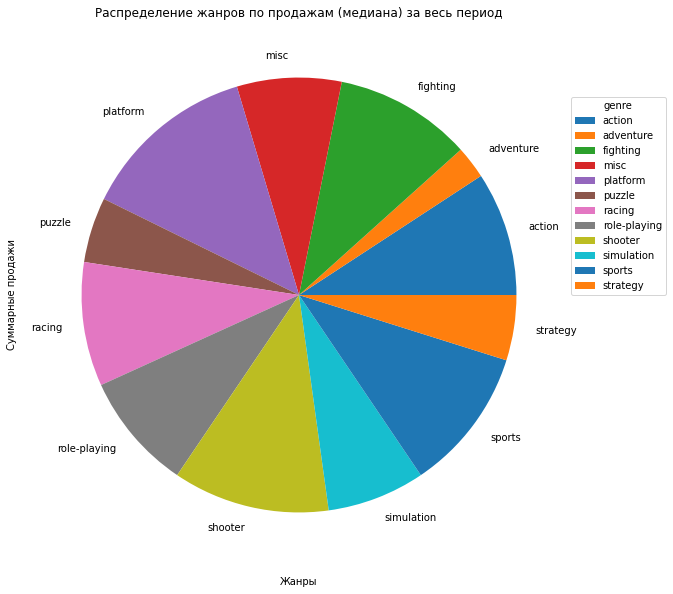

In [120]:
games_genre.plot.pie(y='total_sales',  figsize=(15, 10 ))
plt.title('Распределение жанров по продажам (медиана) за весь период')
plt.legend(title='genre', loc=(1.0, 0.5))
plt.xlabel('Жанры', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

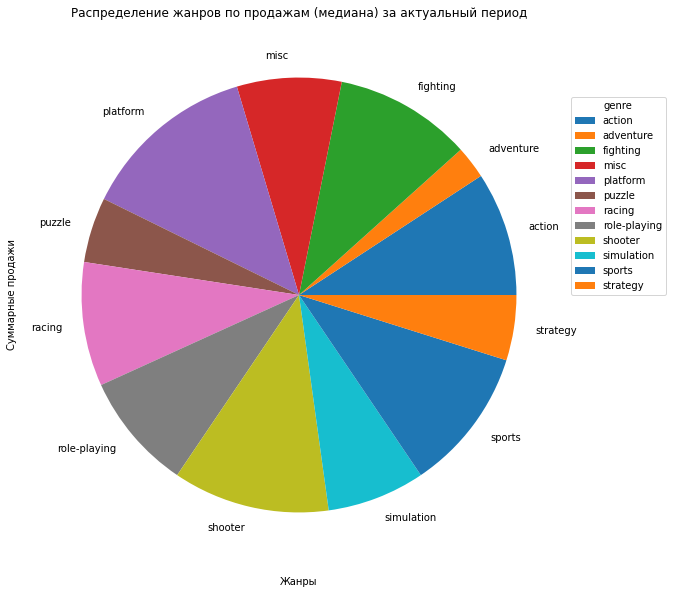

In [121]:
games_genre.plot.pie(y='total_sales',  figsize=(15, 10 ))
plt.title('Распределение жанров по продажам (медиана) за актуальный период')
plt.legend(title='genre', loc=(1.0, 0.5))
plt.xlabel('Жанры', labelpad = 10)
plt.ylabel('Суммарные продажи', labelpad = 10)
plt.show()

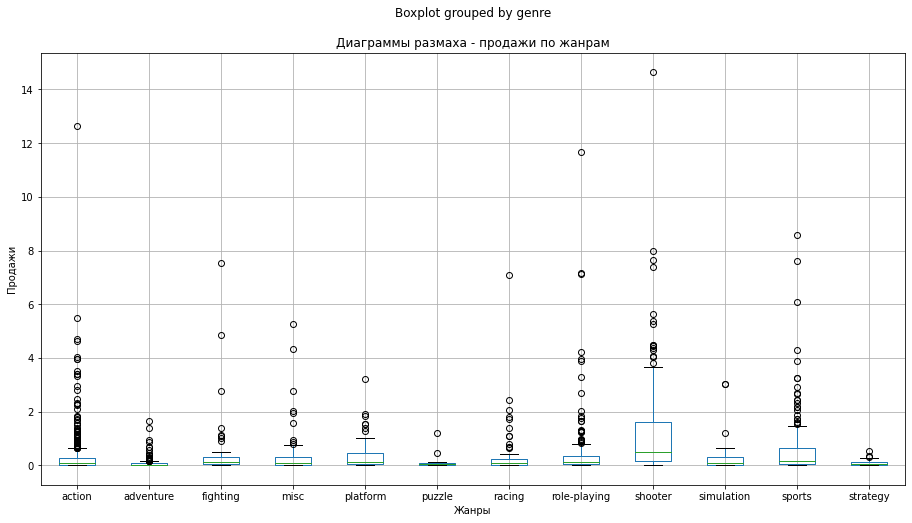

In [122]:
games_actual.boxplot(
    column='total_sales', by='genre', figsize=(15, 8))
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Диаграммы размаха - продажи по жанрам')

plt.show()

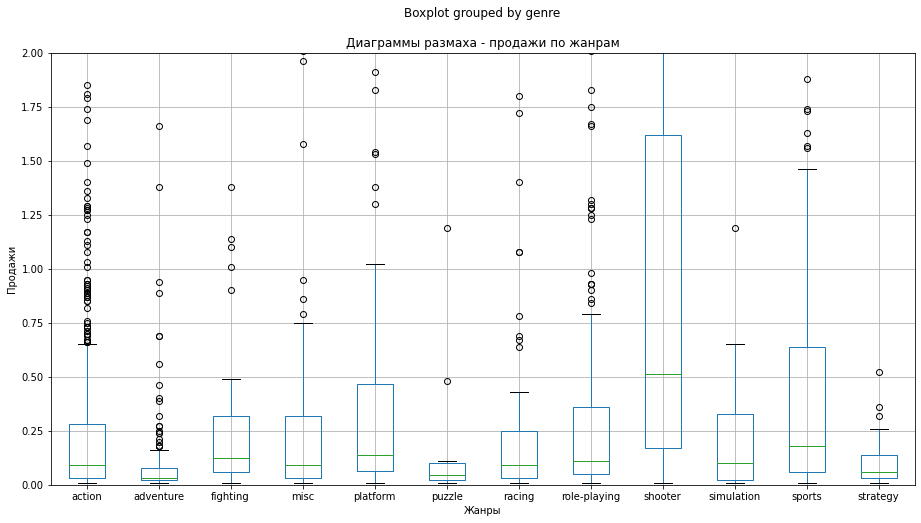

In [123]:
games_actual.boxplot(
    column='total_sales', by='genre', figsize=(15, 8))
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Диаграммы размаха - продажи по жанрам')
plt.ylim(0, 2)
plt.show()

Топ-5 жанров за весь период 1980-2016 по медианным продажам<br>
1. platform	0.27<br>
2. shooter	0.24<br>
3. sports	0.22<br>
4. fighting	0.21<br>
5. action	0.19<br>

Топ-5 жанров за актуальный период 2014-2016 по медианным продажам<br>
1.	shooter	0.515<br>
2.	sports	0.180<br>
3.	platform	0.140<br>
4.	fighting	0.125<br>
5.	role-playing	0.110<br>

Если сравнивать периоды 1980-2016 и 2014-2016, то мы видим изменение в топе популярных игр по объему продаж. <br><br>  На первое место по медианным значениям продаж поднялся жанр игр Shooter -этот жанр компьютерной игры основан на стрельбе и уничтожении врагов. <br><br> На второе место поднялись и набрали популярность Sports - спортивные видеоигры, жанр, который имитирует практику спорта. С помощью игры воссоздано большинство видов спорта, включая командные виды спорта, легкую атлетику, экстремальные виды спорта и единоборства. <br><br> На третье место опустился с лидирующей позиции жанр platform жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня. <br><br>   Держится на своем четвертом месте fighting - жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого ареной (часть игровой вселенной, не управляемая участником игры, на которой происходят основные действия игры). <br><br>  Замыкает тпо-5 по медианным продажам  role-playing - В RPG (от англ. role-playing game — ролевая игра) ваш герой бродит по обширному миру, знакомится с неигровыми персонажами (NPC, от англ. none-player character), выполняет квесты, рубит монстров, получает в результате приключений очки опыта и ценные предметы. Один из столпов жанра — прокачка. <br><br> Вылетел из топ-5 жанр Action /экшен/ - (action в переводе с англ. — «действие») или боевик — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока.

### **Портрет пользователя по регионам**

#### Популярные платформы по регионам

na_sales - продажи в Северной Америке (миллионы проданных копий) <br><br> eu_sales - продажи в Европе (миллионы проданных копий) <br><br> jp_sales - продажи в Японии (миллионы проданных копий) <br><br> other_sales - продажи в других странах (миллионы проданных копий)

In [124]:
# распределение платформ за актуальный период по регионам
games_platform_region = games_actual.pivot_table(
    index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
    aggfunc='sum').reset_index()
display(games_platform_region)

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,3DS,16.12,44.24,22.64,3.68,86.68
1,PC,17.97,0.00,7.23,1.85,27.05
2,PS3,25.54,11.22,22.05,9.37,68.18
3,PS4,130.04,15.02,98.61,44.48,288.15
4,PSP,0.00,0.36,0.00,0.00,0.36
5,PSV,3.53,14.54,2.52,1.81,22.40
6,Wii,2.59,0.00,2.08,0.40,5.07
7,WiiU,13.15,7.31,19.36,3.16,42.98
8,X360,15.49,0.08,28.30,4.35,48.22
9,XOne,46.25,0.32,81.27,12.52,140.36


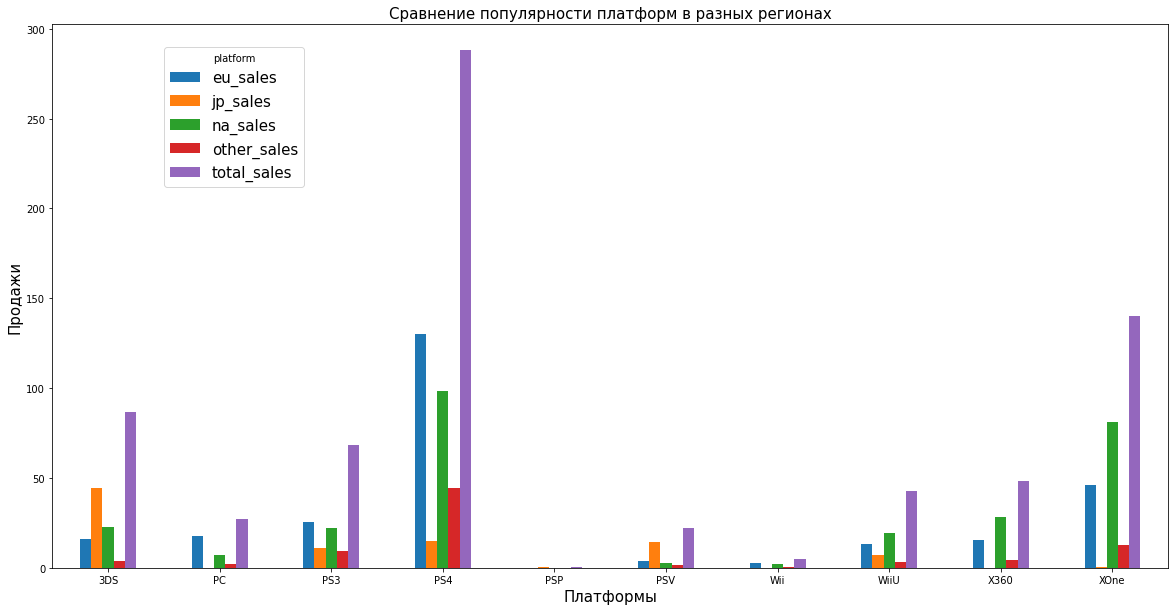

In [125]:
games_platform_region.plot.bar(x="platform", rot=0,  figsize =(20, 10))
plt.title('Сравнение популярности платформ в разных регионах', fontsize=15)
plt.legend(title='platform', loc=(0.1, 0.7), fontsize=15)
plt.xlabel('Платформы', fontsize=15)
plt.ylabel('Продажи',fontsize=15)
plt.show()

In [126]:
region_title = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in region_title:
    if region == 'na_sales':
        games_platform_region_na = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    elif region == 'eu_sales':
        games_platform_region_eu = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    elif region == 'jp_sales':
        games_platform_region_jp = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    elif region == 'other_sales':
        games_platform_region_other = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
print()
print('Платформы по популярности, Северная Америка')
display(games_platform_region_na)
print('Платформы по популярности, Европа')
display(games_platform_region_eu)
print('Платформы по популярности, Япония')
display(games_platform_region_jp)
print('Платформы по популярности, другие страны')
display(games_platform_region_other)


Платформы по популярности, Северная Америка


,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


Платформы по популярности, Европа


,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


Платформы по популярности, Япония


,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


Платформы по популярности, другие страны


,platform,other_sales
0,PS4,44.48
1,XOne,12.52
2,PS3,9.37
3,X360,4.35
4,3DS,3.68
5,WiiU,3.16
6,PC,1.85
7,PSV,1.81
8,Wii,0.40
9,PSP,0.00


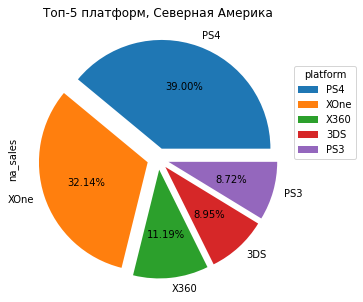

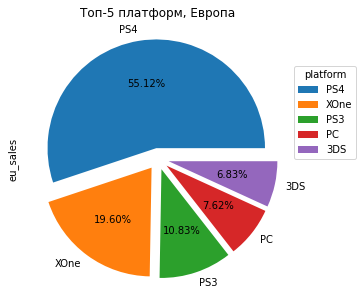

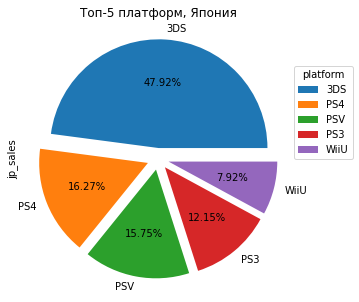

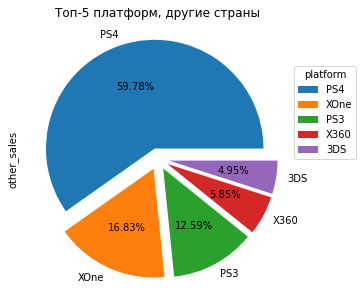

In [127]:
region_title = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

for region in region_title:
    if region == 'na_sales':
        games_platform_region_na = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 платформ, Северная Америка')
        
    elif region == 'eu_sales':
        games_platform_region_eu = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 платформ, Европа')
       
    elif region == 'jp_sales':
        games_platform_region_jp = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 платформ, Япония')
        
    elif region == 'other_sales':
        games_platform_region_other = games_actual.pivot_table(
            index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 платформ, другие страны')
    plt.legend(title='platform', loc=(1.0, 0.5))
    plt.show()

**na_sales - продажи в Северной Америке (миллионы проданных копий)**<br>По продажам в Северной Америке лидируют платформы PS4 (98.61) и	XOne (81.27), причем платформа PS4 - более 30% от суммарных продаж по всем регионам. Топовые платформы Северной Аменики по убыванию: лидируют PS4 и XOne (более 70% в топе), оставшаяся часть X360, 3DS, PS3.<br><br>
**eu_sales - продажи в Европе (миллионы проданных копий)**<br> По продажам в Европе также лидирует платформа PS4 (130.04), значительно отстают XOne (46.25) и PS3	(25.54). Топовая платформа Европы: лидирует PS4 (более 55% в топе), оставшаяся часть XOne, PS3, PC, 3DS. <br><br>
**jp_sales - продажи в Японии (миллионы проданных копий)**<br> По продажам в Японии лидируют платформы 3DS (44.24) и PS4	(15.02). Топовые платформы Японии по убыванию: лидирует 3DS (более 47% в топе), оставшаяся часть PS4, PSV, PS3 и WiiU, которые не полулярны в других регионах<br><br> 
**other_sales - продажи в других странах (миллионы проданных копий)** По продажам в других регионах лидируют платформы PS4 (44.48) и XOne (12.52) - незначительная часть от суммарных продаж по всем регионам. Оставшаяся часть PS3, X360, 3DS.

#### Популярные жанры по регионам

In [128]:
# распределение жанров за актуальный период по регионам по объему продаж
games_genre_region = games_actual.pivot_table(
    index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='sum').reset_index()
display(games_genre_region)

,genre,eu_sales,jp_sales,na_sales,other_sales
0,action,74.68,29.58,72.53,22.57
1,adventure,6.49,3.60,5.64,1.82
2,fighting,6.69,6.37,12.43,2.73
3,misc,12.86,5.61,15.05,4.03
4,platform,6.80,2.69,6.79,1.81
5,puzzle,0.52,0.93,0.65,0.11
6,racing,14.13,1.76,8.74,2.89
7,role-playing,28.17,31.16,33.47,8.64
8,shooter,65.52,4.87,79.02,21.53
9,simulation,7.30,2.31,2.63,0.89


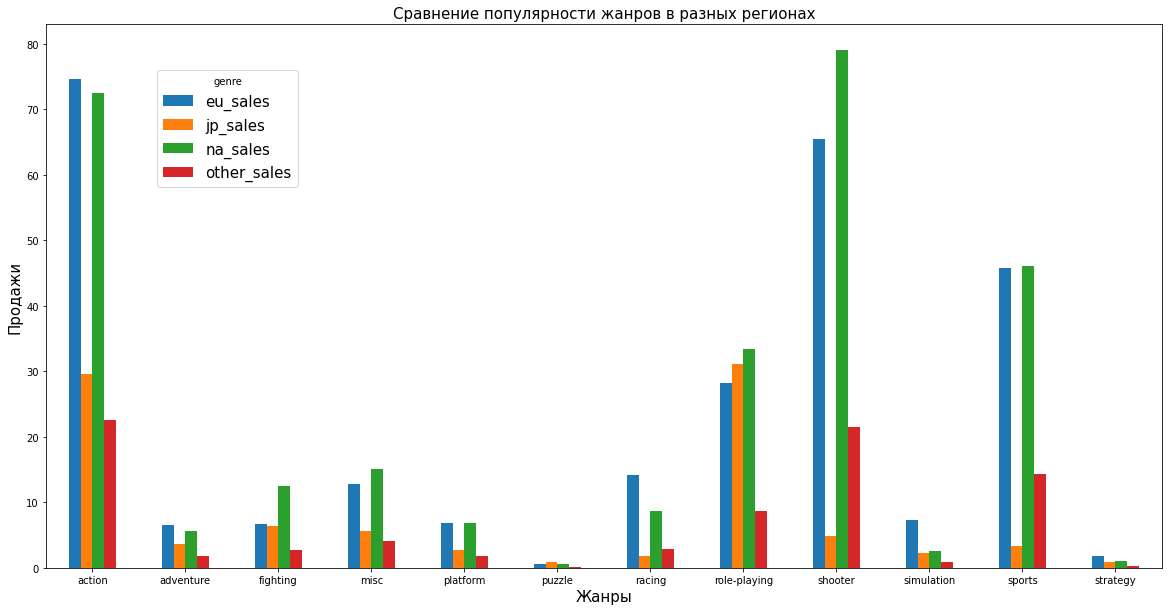

In [129]:
games_genre_region.plot.bar(x="genre", rot=0,  figsize =(20, 10))
plt.title('Сравнение популярности жанров в разных регионах', fontsize=15)
plt.legend(title='genre', loc=(0.1, 0.7), fontsize=15)
plt.xlabel('Жанры', fontsize=15)
plt.ylabel('Продажи',fontsize=15)
plt.show()

In [130]:
region_title = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in region_title:
    if region == 'na_sales':
        games_genre_region_na = games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    elif region == 'eu_sales':
        games_genre_region_eu = games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    elif region == 'jp_sales':
        games_genre_region_jp = games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    elif region == 'other_sales':
        games_genre_region_other = games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
print()
print('Жанры по популярности, Северная Америка')
display(games_genre_region_na)
print('Жанры по популярности, Европа')
display(games_genre_region_eu)
print('Жанры по популярности, Япония')
display(games_genre_region_jp)
print('Жанры по популярности, другие страны')
display(games_genre_region_other)    


Жанры по популярности, Северная Америка


,genre,na_sales
0,shooter,79.02
1,action,72.53
2,sports,46.13
3,role-playing,33.47
4,misc,15.05
5,fighting,12.43
6,racing,8.74
7,platform,6.79
8,adventure,5.64
9,simulation,2.63


Жанры по популярности, Европа


,genre,eu_sales
0,action,74.68
1,shooter,65.52
2,sports,45.73
3,role-playing,28.17
4,racing,14.13
5,misc,12.86
6,simulation,7.30
7,platform,6.80
8,fighting,6.69
9,adventure,6.49


Жанры по популярности, Япония


,genre,jp_sales
0,role-playing,31.16
1,action,29.58
2,fighting,6.37
3,misc,5.61
4,shooter,4.87
5,adventure,3.60
6,sports,3.26
7,platform,2.69
8,simulation,2.31
9,racing,1.76


Жанры по популярности, другие страны


,genre,other_sales
0,action,22.57
1,shooter,21.53
2,sports,14.36
3,role-playing,8.64
4,misc,4.03
5,racing,2.89
6,fighting,2.73
7,adventure,1.82
8,platform,1.81
9,simulation,0.89


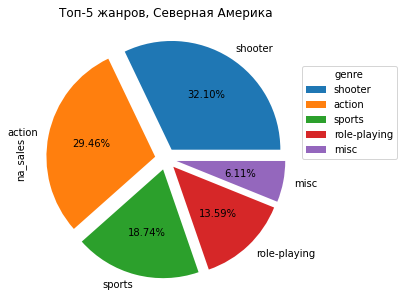

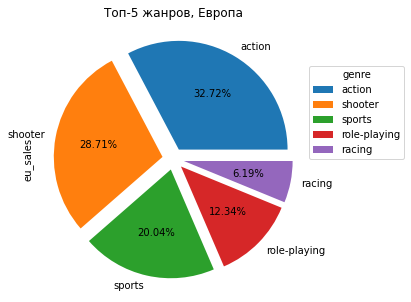

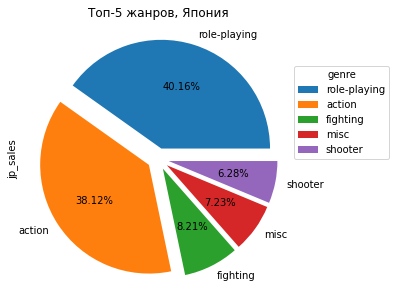

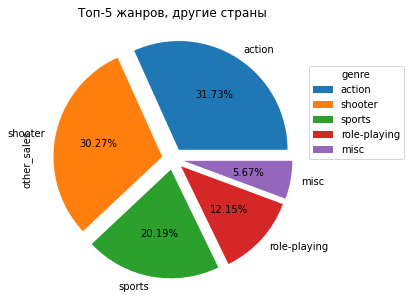

In [131]:
region_title = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

for region in region_title:
    if region == 'na_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 жанров, Северная Америка')
    
    elif region == 'eu_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 жанров, Европа')
        
    elif region == 'jp_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 жанров, Япония')
        
    elif region == 'other_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode)
        plt.title('Топ-5 жанров, другие страны')
        
    plt.legend(title='genre', loc=(1.0, 0.5))
    plt.show()

In [132]:
# распределение жанров за актуальный период по регионам по медианным продажам
games_genre_region_median = games_actual.pivot_table(
    index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='median').reset_index()
display(games_genre_region)

,genre,eu_sales,jp_sales,na_sales,other_sales
0,action,74.68,29.58,72.53,22.57
1,adventure,6.49,3.60,5.64,1.82
2,fighting,6.69,6.37,12.43,2.73
3,misc,12.86,5.61,15.05,4.03
4,platform,6.80,2.69,6.79,1.81
5,puzzle,0.52,0.93,0.65,0.11
6,racing,14.13,1.76,8.74,2.89
7,role-playing,28.17,31.16,33.47,8.64
8,shooter,65.52,4.87,79.02,21.53
9,simulation,7.30,2.31,2.63,0.89


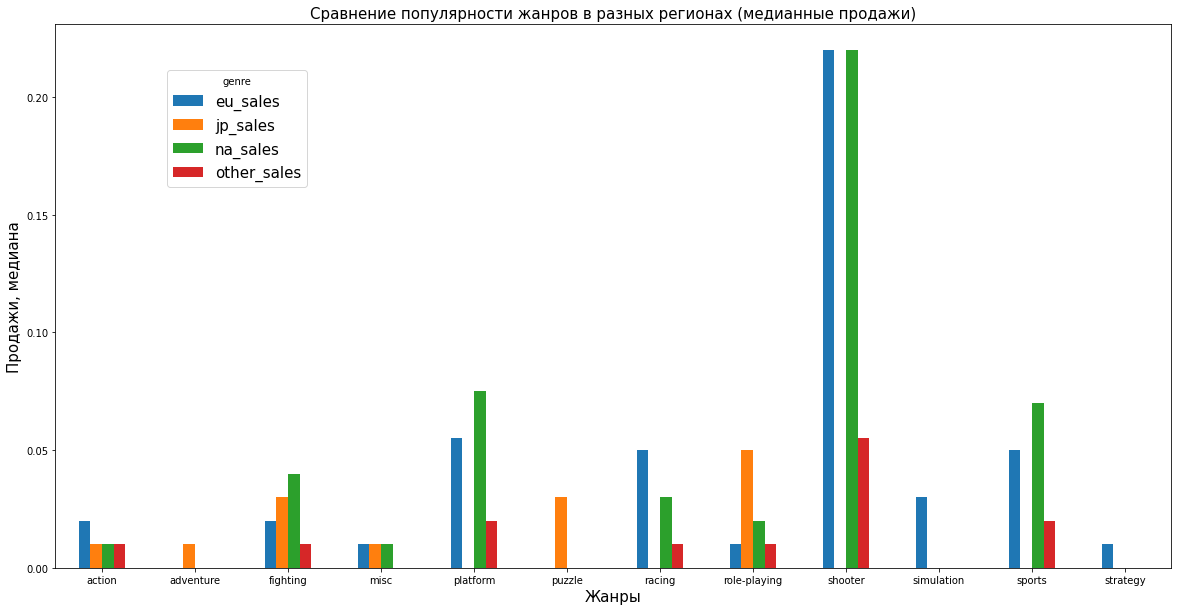

In [133]:
# распределение медианных значений
games_genre_region_median.plot.bar(x="genre", rot=0,  figsize =(20, 10))
plt.title('Сравнение популярности жанров в разных регионах (медианные продажи)', fontsize=15)
plt.legend(title='genre', loc=(0.1, 0.7), fontsize=15)
plt.xlabel('Жанры', fontsize=15)
plt.ylabel('Продажи, медиана',fontsize=15)
plt.show()

In [134]:
region_title = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in region_title:
    if region == 'na_sales':
        games_genre_region_na_median = games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).reset_index()
    elif region == 'eu_sales':
        games_genre_region_eu_median = games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).reset_index()
    elif region == 'jp_sales':
        games_genre_region_jp_median = games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).reset_index()
    elif region == 'other_sales':
        games_genre_region_other_median = games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).reset_index()
print()
print('Жанры по популярности (медиана), Северная Америка')
display(games_genre_region_na_median)
print('Жанры по популярности (медиана), Европа')
display(games_genre_region_eu_median)
print('Жанры по популярности (медиана), Япония')
display(games_genre_region_jp_median)
print('Жанры по популярности (медиана), другие страны')
display(games_genre_region_other_median)    


Жанры по популярности (медиана), Северная Америка


,genre,na_sales
0,shooter,0.220
1,platform,0.075
2,sports,0.070
3,fighting,0.040
4,racing,0.030
5,role-playing,0.020
6,action,0.010
7,misc,0.010
8,adventure,0.000
9,puzzle,0.000


Жанры по популярности (медиана), Европа


,genre,eu_sales
0,shooter,0.220
1,platform,0.055
2,racing,0.050
3,sports,0.050
4,simulation,0.030
5,action,0.020
6,fighting,0.020
7,misc,0.010
8,role-playing,0.010
9,strategy,0.010


Жанры по популярности (медиана), Япония


,genre,jp_sales
0,role-playing,0.05
1,fighting,0.03
2,puzzle,0.03
3,action,0.01
4,adventure,0.01
5,misc,0.01
6,platform,0.00
7,racing,0.00
8,shooter,0.00
9,simulation,0.00


Жанры по популярности (медиана), другие страны


,genre,other_sales
0,shooter,0.055
1,platform,0.020
2,sports,0.020
3,action,0.010
4,fighting,0.010
5,racing,0.010
6,role-playing,0.010
7,adventure,0.000
8,misc,0.000
9,puzzle,0.000


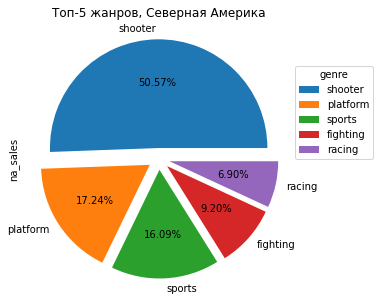

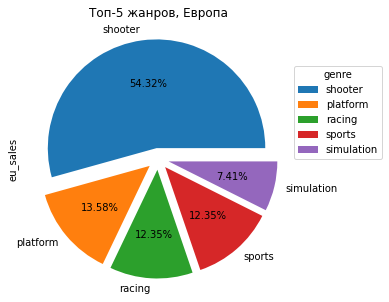

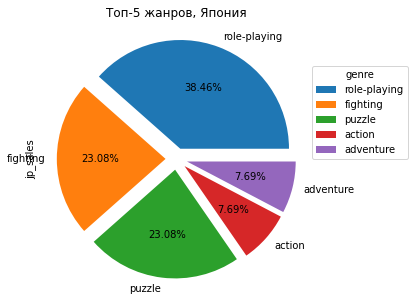

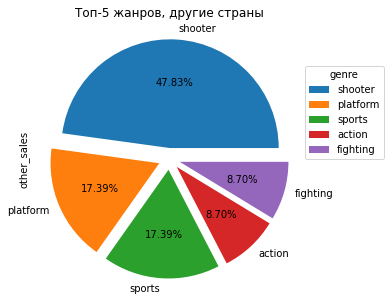

In [135]:
region_title = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

for region in region_title:
    if region == 'na_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(5, 5), autopct='%1.2f%%', explode=explode, normalize=True)
        plt.title('Топ-5 жанров, Северная Америка')
    
    elif region == 'eu_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5),  autopct='%1.2f%%', explode=explode, normalize=True)
        plt.title('Топ-5 жанров, Европа')
        
    elif region == 'jp_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode, normalize=True)
        plt.title('Топ-5 жанров, Япония')
        
    elif region == 'other_sales':
        games_actual.pivot_table(
            index='genre', values=region, aggfunc='median').sort_values(by=region, ascending=False).head().plot.pie(
            y=region, figsize=(10, 5), autopct='%1.2f%%', explode=explode, normalize=True)
        plt.title('Топ-5 жанров, другие страны')
    
    plt.legend(title='genre', loc=(1.0, 0.5))
    plt.show()

Абсолютным лидером в Европе и Северной Америке является жанр Shooter. <br><br> 
**Северная Америка (млн проданных копий)** - Абсолютными лидерами по суммарным продажам являются жанры Shooter (79.02) и Action (72.53), более 60% в топе. Далее следуют в порядке убывания Sports (46.13), Role-Playing (33.47) и Misc (15.05). По медианным значениям другая картина. Лидеры Shooter	(0.220) и Platform	(0.075), далее в порядке убывания Sports (0.070), Fighting (0.040) и Racing	(0.030).

**Европа (млн проданных копий)** - Аналогично с Северной Америкой, но с неколько меньшими объемами: Абсолютными лидерами являются жанры Action (74.68) и Shooter (65.52), более 60% в топе. Далее следуют в порядке убывания Sports (45.73), Role-Playing	(28.17) и Misc (14.13). По медианным значениям - Shooter (0.220) и Platform	(0.055) лидируют, далее в порядке убывания Racing (0.050), Sports (0.050), Simulation (0.030) <br><br> 

**Япония (млн проданных копий)** Картина иная.  Абсолютными лидерами являются жанры Role-Playing	(31.16) и Action (29.58), более 78% в топе. Далее следуют в порядке убывания Fighting (6.37), Misc (5.61), Shooter	(4.87). Причем доля рынка значитеьно ниже, чем в Северной Америке и Европе. По медианным значениям другая картина. Лидер также Role-playing (0.05), далее в порядке убывания Fighting	(0.03), Puzzle (0.03), Action (0.01), Adventure (0.01). <br><br> 

**Другие страны (млн проданных копий)**  Абсолютными лидерами являются жанры Action (22.57) и Shooter (21.53), более 60% в топе. Далее следуют в порядке убывания Sports (14.36), Role-Playing (8.64) и Misc (4.03). Медианные значения отличаются. Лидер - shooter	(0.055), далее в порядке убывания: Platform	(0.020), Sports	(0.020), Action	(0.010) и Fighting	(0.010) <br><br>

#### Влияние рейтинга ESRB на продажи в регионах

Система ESRB - США, Мексика и Канада:
EC - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
E 10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.
T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.
AO - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.
RP - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

In [136]:
# распределение платформ за актуальный период по регионам
games_rating_region = games_actual.pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='sum').reset_index()
display(games_rating_region)

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,58.06,8.94,50.74,15.39
1,E10+,26.16,4.46,33.23,7.83
2,M,93.44,8.01,96.42,28.67
3,T,34.07,14.78,38.95,11.33
4,no_rating,58.95,56.90,64.72,18.40


In [137]:
# проверка уникальных значений рейтинга
games_actual['rating'].sort_values().unique()

array(['E', 'E10+', 'M', 'T', 'no_rating'], dtype=object)

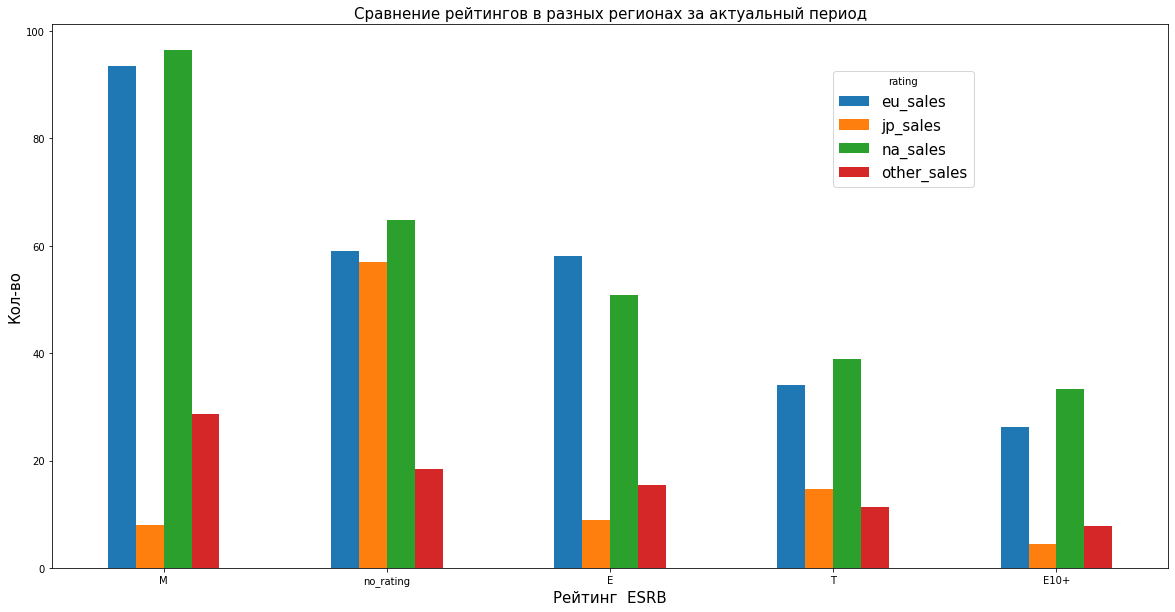

In [138]:
games_rating_region.sort_values(by=['na_sales'], ascending=False).plot.bar(x="rating", rot=0,  figsize =(20, 10))
plt.title('Сравнение рейтингов в разных регионах за актуальный период', fontsize=15)
plt.legend(title='rating', loc=(0.7, 0.7), fontsize=15)
plt.xlabel('Рейтинг  ESRB', fontsize=15)
plt.ylabel('Кол-во',fontsize=15)
plt.show()

In [139]:
# распределение платформ за весь период по регионам
games_rating_region1 = games.pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='sum').reset_index()
display(games_rating_region1)

,rating,eu_sales,jp_sales,na_sales,other_sales
0,AO,0.61,0.00,1.26,0.09
1,E,704.14,199.42,1276.80,231.57
2,E10+,183.35,40.20,345.50,71.93
3,EC,0.11,0.00,1.53,0.11
4,M,480.00,63.58,742.89,176.06
5,RP,0.03,0.00,0.00,0.01
6,T,421.79,150.70,747.60,152.99
7,no_rating,609.65,836.74,1225.84,149.87


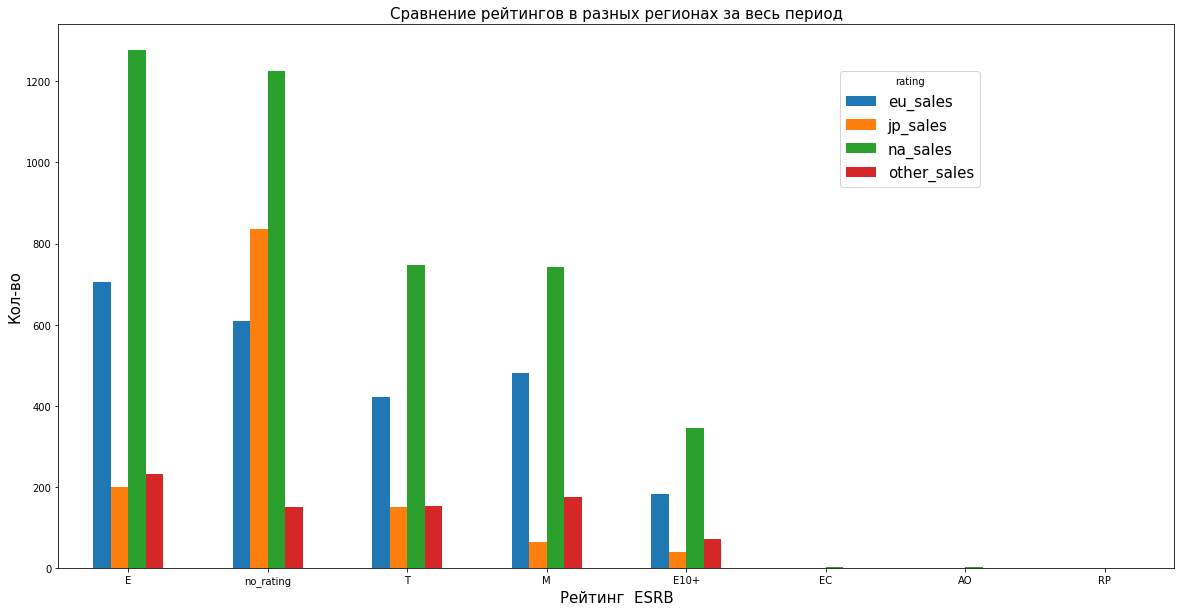

In [140]:
games_rating_region1.sort_values(by=['na_sales'], ascending=False).plot.bar(x="rating", rot=0,  figsize =(20, 10))
plt.title('Сравнение рейтингов в разных регионах за весь период', fontsize=15)
plt.legend(title='rating', loc=(0.7, 0.7), fontsize=15)
plt.xlabel('Рейтинг  ESRB', fontsize=15)
plt.ylabel('Кол-во',fontsize=15)
plt.show()

**В Северной Америке и Европе** Если не брать во внимание "без рейтинга", то наиболее восстребован жанр E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. <br> На втором месте M - для лиц старше 17 лет - этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь и и T - подходит для лиц старше 13 лет (Игра может содержать более реалистичные и натуралистические сцены насилия). <br> Далее идут игры E 10+ - подходит для лиц старше 10 лет (Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей). 
Есть достаточно большое количество "без рейтинга" no_rating - были заменены пропущенные значения.<br><br>
**В Японии** Подавляющее большинство "без рейтинга" no_rating. Возможно это связано с тем, что там своя организация рейтингов.  Далее, в незначительном количестве, по убыванию идут E - Подходит для всех возрастных категорий, T - Подходит для лиц старше 13 лет, , M - Подходит для лиц старше 17 лет и E 10+ - Подходит для лиц старше 10 лет.

### **Проверка гипотез**

 - Средние пользовательские рейтинги платформ Xbox One и PS одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. "действие", экшен-игры) и Sports (англ. "спортивные соревнования") разные.
 

#### Средние пользовательские рейтинги платформ Xbox One и PS одинаковые

Сформулируем нулевую и анльтернативную гипотезы:
- Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы правильно

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяет метод scipy.stats.ttest_ind(). Методу передаем два массива.

In [141]:
xone = games_actual.query('platform == "XOne"').dropna(subset = ['user_score']).reset_index()
display(xone.head(3))
print('Средняя оценка пользователей для XONE:', xone['user_score'].mean())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,165,grand theft auto v,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1,179,call of duty: advanced warfare,XOne,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
2,241,halo 5: guardians,XOne,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49


Средняя оценка пользователей для XONE: 6.594545454545456


In [142]:
pc = games_actual.query('platform == "PC"').dropna(subset = ['user_score']).reset_index()
display(pc.head(3))
print('Средняя оценка пользователей для PC:', pc['user_score'].mean())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,455,the sims 4,PC,2014,simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1,1515,fallout 4,PC,2015,role-playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
2,1710,grand theft auto v,PC,2015,action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17


Средняя оценка пользователей для PC: 6.298360655737705


In [143]:
# Сделаем двa массива по названиям платформ
xone_user = pd.Series(xone['user_score'])
pc_user = pd.Series(pc['user_score'])
print('Выборка xone', xone_user)
print()
print('Выборка pc', pc_user)

Выборка xone 0      7.9
1      5.4
2      6.4
3      6.2
4      4.1
      ... 
160    6.8
161    6.0
162    8.2
163    6.6
164    6.7
Name: user_score, Length: 165, dtype: float64

Выборка pc 0      3.9
1      5.4
2      7.9
3      5.7
4      5.9
      ... 
117    8.3
118    6.8
119    7.9
120    1.4
121    7.6
Name: user_score, Length: 122, dtype: float64


In [144]:
# установим уровень статистической значимости 0,05
alpha = 0.05

results = st.ttest_ind(xone_user, pc_user, equal_var=False)

# получившееся р-значение
print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу Н0')
else:
    print('Не получилось отвергнуть нулевую гипотезу Н0')

р-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу Н0


Таким образом, рейтинги платформ Xbox One и PC одинаковые и нашу гипотезу H0 - средний пользовательский рейтинг платформ Xbox One и PC одинаковый - отвергнуть не получилось. Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и анльтернативную гипотезы:

- Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяет метод scipy.stats.ttest_ind(). Методу передаем два массива.

In [145]:
action = games_actual.query('genre == "action"').dropna(subset = ['user_score']).reset_index()
display(action.head(3))
print('Средняя оценка пользователей для action:', action['user_score'].mean())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,165,grand theft auto v,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,230,uncharted: the nathan drake collection,PS4,2015,action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62


Средняя оценка пользователей для action: 6.760606060606061


In [146]:
sports = games_actual.query('genre == "sports"').dropna(subset = ['user_score']).reset_index()
display(sports.head(3))
print('Средняя оценка пользователей для sports:', sports['user_score'].mean())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
1,94,fifa 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
2,143,fifa 15,PS4,2014,sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08


Средняя оценка пользователей для sports: 5.2251968503937


In [147]:
# Сделаем двa массива по названиям платформ

action_user = pd.Series(action['user_score'])
sports_user = pd.Series(sports['user_score'])
print('Выборка action', action_user)
print()
print('Выборка sports', sports_user)

Выборка action 0      8.3
1      7.9
2      8.1
3      6.3
4      4.9
      ... 
292    6.8
293    6.0
294    8.5
295    6.7
296    7.6
Name: user_score, Length: 297, dtype: float64

Выборка sports 0      4.3
1      5.0
2      5.7
3      4.5
4      6.7
      ... 
122    6.3
123    8.8
124    6.9
125    1.4
126    6.6
Name: user_score, Length: 127, dtype: float64


In [148]:
# установим уровень статистической значимости 0,05
alpha = 0.05

results = st.ttest_ind(action_user, sports_user, equal_var=False)

# получившееся р-значение
print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу Н0')
else:
    print('Не получилось отвергнуть нулевую гипотезу Н0')

р-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу Н0


Принимаем альтернативную гипотезу, p-значение достаточно мало, что дает основание отвергнуть гипотезу Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.

### **ОБЩИЙ ВЫВОД**

In [149]:
games.shape

(16444, 13)

В результате предобработки данных было удалено примерно 1,5% строк с пропущенными данными. <br> * Были изменены назнавания колонок, названия жанров, названия игр - они приведены к нижнему регистру. Также в названии игр убраны лишние пробелы в начале и в конце строки. <br> * Незначительное количество пропусков в столбцах name (название игры), year_of_release (год выпуска) и genre (жанр игры) - от 0 до 1 %. Пропуски в 'name' и 'genre' всего в 2 строках и они совпадают. Удалим эти 2 строки, так как помимо наименования и жанра они еще имеют достаточно пропусков. Строк с пропущенными значениями в годах 269, в районе 1%, заменять их нецелесообразно, поэтому удаляем <br> * Помимо nan в столбце присутствовало значение 'tbd'. Аббревиатура расшифровывается как - To Be Determined, то есть "Будет определено". У этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. Данную абревиатуру необходимо заменить, так как она не даст изменить тип данных в столбце. Заменим на nan. <br> * Категория 'K-A' в рейтинге - это устаревшая категория игр - для детей и взрослых: игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E. Следовательно, заменили рейтинг K-A в таблице на E. Пропуски в рейтинге не удаляли, их большое количество и есть риск исказить исходные даннные. Далее заменили их на категирию "без рейтинга. <br> * Изменены типы данных в стобце 'year_of_release' (год) на int (целое число) и в столбце 'user_score' (оценка пользователей) на float (вещественное число).<br> * Добавлен был столбец 'total_sales' (суммарные продажи по всем регионам)

Мы имеет данные за период 1980-2016 года. Начало этого периода совпало с появлением домашних компьютеров.
На графике 'Количество игр, выпускаемых в разные годы' и таблице games_volume_year мы видим, что активный рост количества выпускаемых игр начался после 1994 года. В 1994 количество превысило 100. Резкий рос начался в 2001 году, далее период 2003-2004 - некоторый спад, и снова с 2005 резкий рост до 2012 года. Период с 2013 до 2016 года характеризуется спадом большинства платформ. <br> 'DS' платформа с самым длинным периодом существования, она просуществовала с 1985 по 2013 год, но пик ее пришелся уже на 2005-2010 года. Остальные платформы из Топ-6 просуществовали от 10 до 12 лет: 'PS2' - 12 лет (2000-2011 год), 'X360' - 12 лет (2005-2016 год), 'PS3' - 11 лет (2006-2016 год), 'Wii' - 11 лет (2006-2016 год), 'PS' - 10 лет (1994-2003 год). Пик актуальности практически у все топ-6 приходится на середину периода. Раньше всех актуальность потеряли платформы 'PS' и 'PS2'. <br> 
По продажам в Северной Америке лидируют платформы X360 (226.11) и PS3 (167.59), причем платформа X360 - более 50% от суммарных продаж по всем регионам. Топовые платформы Северной Аменики по убыванию: лидируют X360 и PS3 (более 60% в топе), оставшаяся часть PS4, XOne, 3DS.
eu_sales - продажи в Европе (миллионы проданных копий)
По продажам в Европе также лидирует платформа PS3 (161.84), незначительно отстают X360 (116.39) и PS4 (109.31). Топовые платформы Европы по убыванию: лидируют PS3, X360 и PS4 (более 75% в топе), оставшаяся часть 3DS и PS.
jp_sales - продажи в Японии (миллионы проданных копий)
По продажам в Японии лидируют платформы 3DS (92.59) и PS3 (48.09). Топовые платформы Японии по убыванию: лидируют 3DS и PS3 (более 70% в топе), оставшаяся часть PSP, PSV и WiiU, которые не полулярны в других регионах
other_sales - продажи в других странах (миллионы проданных копий) По продажам в других регионах лидируют платформы PS3 (64.45) и PS4 (38.11) - незначительная часть от суммарных продаж по всем регионам. Оставшаяся часть X360, 3DS и ХOne.

Актуальным периодом возьмем 3 года, предшествующих прогнозируемому 2017 году. Оставляем только актуальные платформы и срез - период 2014-2016 (2016 год неполные данные). <br>  В актуальном списке 10 платформ. На пике в актуальном периоде находятся платформы PS4 и XOne по суммарным продажам. По данным видно, что практически все остальные платформы находятся в стадии снижения показателей. Всплески есть еще у платформ 3DS, PS3 и X360, но в общем продажи уже падают. <br> 

Рассмотрев зависимость оценки пользователей и оценки критиков на суммарные продажи можно сделать следующий вывод. 
Коэффициенты корреляции от оценки пользователлей отрицательные, есть очень слабая обратная зависимость, коэффициенты очень малы.
Коэффициенты корреляции от оценки критиков положительные, имеется прямая зависимость, но она слабая. Нельзя с уверенностью сказать, что именно отзывы пользователей или критоков влияют на продажи. Хотя стоит отметить , что оценка критиков оказывает большее влияние, чем оценка пользователей.

Если сравнивать периоды 1980-2016 и 2014-2016, то мы видим изменение в топе популярных игр по объему продаж. <br>  На первое место по медианным значениям продаж поднялся жанр игр Shooter -этот жанр компьютерной игры основан на стрельбе и уничтожении врагов. <br> На второе место поднялись и набрали популярность Sports - спортивные видеоигры, жанр, который имитирует практику спорта. С помощью игры воссоздано большинство видов спорта, включая командные виды спорта, легкую атлетику, экстремальные виды спорта и единоборства. <br> На третье место опустился с лидирующей позиции жанр Platform жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня. <br>  Держится на своем четвертом месте Fighting - жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого ареной (часть игровой вселенной, не управляемая участником игры, на которой происходят основные действия игры). <br>  Замыкает тпо-5 по медианным продажам  Role-playing - В RPG (от англ. role-playing game — ролевая игра) ваш герой бродит по обширному миру, знакомится с неигровыми персонажами (NPC, от англ. none-player character), выполняет квесты, рубит монстров, получает в результате приключений очки опыта и ценные предметы. Один из столпов жанра — прокачка. <br> Вылетел из топ-5 жанр Action /экшен/ - (action в переводе с англ. — «действие») или боевик — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока.<br><br > Абсолютным лидером в Европе и Северной Америке является жанр Shooter. <br><br> 
Северная Америка (млн проданных копий) - Абсолютными лидерами по суммарным продажам являются жанры Shooter (79.02) и Action (72.53), более 60% в топе. Далее следуют в порядке убывания Sports (46.13), Role-Playing (33.47) и Misc (15.05). По медианным значениям другая картина. Лидеры Shooter	(0.220) и Platform	(0.075), далее в порядке убывания Sports (0.070), Fighting (0.040) и Racing	(0.030).

Европа (млн проданных копий) - Аналогично с Северной Америкой, но с неколько меньшими объемами: Абсолютными лидерами являются жанры Action (74.68) и Shooter (65.52), более 60% в топе. Далее следуют в порядке убывания Sports (45.73), Role-Playing	(28.17) и Misc (14.13). По медианным значениям - Shooter (0.220) и Platform	(0.055) лидируют, далее в порядке убывания Racing (0.050), Sports (0.050), Simulation (0.030) <br><br> 

Япония (млн проданных копий) картина иная.  Абсолютными лидерами являются жанры Role-Playing	(31.16) и Action (29.58), более 78% в топе. Далее следуют в порядке убывания Fighting (6.37), Misc (5.61), Shooter	(4.87). Причем доля рынка значитеьно ниже, чем в Северной Америке и Европе. По медианным значениям другая картина. Лидер также Role-playing (0.05), далее в порядке убывания Fighting	(0.03), Puzzle (0.03), Action (0.01), Adventure (0.01). <br><br> 

Другие страны (млн проданных копий).  Абсолютными лидерами являются жанры Action (22.57) и Shooter (21.53), более 60% в топе. Далее следуют в порядке убывания Sports (14.36), Role-Playing (8.64) и Misc (4.03). Медианные значения отличаются. Лидер - shooter	(0.055), далее в порядке убывания: Platform	(0.020), Sports	(0.020), Action	(0.010) и Fighting	(0.010) <br><br>

В Северной Америке и Европе наиболее восстребован жанр E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. <br> На втором месте M - для лиц старше 17 лет - этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь и и T - подходит для лиц старше 13 лет (Игра может содержать более реалистичные и натуралистические сцены насилия).
Есть достаточно большое количество "без рейтинга" no_rating - были заменены пропущенные значения.<br><br>

Япония – отдельный рынок. Подавляющее большинство "без рейтинга" no_rating. Возможно это связано с тем, что там своя организация рейтингов.  Далее, в незначительном количестве, по убыванию идут E - Подходит для всех возрастных категорий, T - Подходит для лиц старше 13 лет, , M - Подходит для лиц старше 17 лет и E 10+ - Подходит для лиц старше 10 лет.

Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет.
Средние пользовательские рейтинги жанров Action и Sports различаются.